In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Chennai House Price Prediction/train-chennai-sale.csv")

In [ ]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [ ]:
# df.drop(["PRT_ID","REG_FEE","COMMIS"],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [ ]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
len(df.PRT_ID.unique())

7109

#CLEANING

##AREA-NOMINALFEATURE

In [ ]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [ ]:
len(df.AREA.unique())

17

In [ ]:
np.sort(df.AREA.unique())

array(['Adyar', 'Adyr', 'Ana Nagar', 'Ann Nagar', 'Anna Nagar',
       'Chormpet', 'Chrmpet', 'Chrompet', 'Chrompt', 'KK Nagar',
       'KKNagar', 'Karapakam', 'Karapakkam', 'T Nagar', 'TNagar',
       'Velachery', 'Velchery'], dtype=object)

In [ ]:
df.AREA.isna().sum()

0

In [ ]:
df.AREA.isnull().sum()

0

In [ ]:
df.AREA

0       Karapakkam
1       Anna Nagar
2            Adyar
3        Velachery
4       Karapakkam
           ...    
7104    Karapakkam
7105     Velachery
7106     Velachery
7107    Karapakkam
7108     Velachery
Name: AREA, Length: 7109, dtype: object

In [ ]:
def shorten_method(s):
  if s in ['Adyar', 'Adyr']:
    return "ADYAR"
  elif s in ['Ana Nagar', 'Ann Nagar', 'Anna Nagar']:
    return "ANNA NAGAR"   
  elif s in ['Chormpet', 'Chrmpet', 'Chrompet', 'Chrompt']:
    return "CHROMPET"   
  elif s in ['KK Nagar','KKNagar']:
    return "KK NAGAR"   
  elif s in [ 'Karapakam', 'Karapakkam']:
    return "KARAPAKKAM"
  elif s in ['T Nagar', 'TNagar']:
    return "T NAGAR"
  elif s in ['Velachery', 'Velchery']:
    return 'VELACHERY'

In [ ]:
df['AREA'] = df['AREA'].apply(shorten_method)

In [ ]:
# df.AREA.replace({'Chrmpet':'Chrompet','Chrompt':'Chrompet'},inplace=True)

In [ ]:
df.AREA.unique()

array(['KARAPAKKAM', 'ANNA NAGAR', 'ADYAR', 'VELACHERY', 'CHROMPET',
       'KK NAGAR', 'T NAGAR'], dtype=object)

In [ ]:
len(df.AREA.unique())

7

In [ ]:
df.AREA

0       KARAPAKKAM
1       ANNA NAGAR
2            ADYAR
3        VELACHERY
4       KARAPAKKAM
           ...    
7104    KARAPAKKAM
7105     VELACHERY
7106     VELACHERY
7107    KARAPAKKAM
7108     VELACHERY
Name: AREA, Length: 7109, dtype: object

In [ ]:
df.AREA.value_counts()

CHROMPET      1702
KARAPAKKAM    1366
KK NAGAR       997
VELACHERY      981
ANNA NAGAR     788
ADYAR          774
T NAGAR        501
Name: AREA, dtype: int64

In [ ]:
df.AREA.isnull().sum()

0

##SALE_COND-NOMINAL FEATURE


In [ ]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,KARAPAKKAM,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,ANNA NAGAR,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,ADYAR,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,VELACHERY,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,KARAPAKKAM,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
np.sort(df.SALE_COND.unique())

array(['Ab Normal', 'AbNormal', 'Adj Land', 'AdjLand', 'Family',
       'Normal Sale', 'PartiaLl', 'Partial', 'Partiall'], dtype=object)

In [ ]:
df.SALE_COND.replace({'Ab Normal':'AbNormal','Adj Land':'AdjLand','PartiaLl':'Partial','Partiall':'Partial'},inplace=True)

In [ ]:
np.sort(df.SALE_COND.unique())

array(['AbNormal', 'AdjLand', 'Family', 'Normal Sale', 'Partial'],
      dtype=object)

##PARKING FACILITY-NOMINAL FEATURE


In [ ]:
np.sort(df.PARK_FACIL.unique())

array(['No', 'Noo', 'Yes'], dtype=object)

In [ ]:
df.replace({"Noo":"No"},inplace=True)

In [ ]:
np.sort(df.PARK_FACIL.unique())

array(['No', 'Yes'], dtype=object)

##BUILDTYPE-NOMINAL FEATURE

In [ ]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,KARAPAKKAM,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,ANNA NAGAR,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,ADYAR,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,VELACHERY,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,KARAPAKKAM,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
np.sort(df.BUILDTYPE.unique())

array(['Comercial', 'Commercial', 'House', 'Other', 'Others'],
      dtype=object)

In [ ]:
df.replace({"Comercial":"Commercial",'Other':'Others'},inplace=True)

In [ ]:
np.sort(df.BUILDTYPE.unique())

array(['Commercial', 'House', 'Others'], dtype=object)

##UTILITY_AVAIL-NOMINAL FEATURE

In [ ]:
np.sort(df.UTILITY_AVAIL.unique())

array(['All Pub', 'AllPub', 'ELO', 'NoSeWa', 'NoSewr '], dtype=object)

In [ ]:
df.UTILITY_AVAIL.value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [ ]:
df.UTILITY_AVAIL.isnull().unique()

array([False])

In [ ]:
df.UTILITY_AVAIL.isna().unique()

array([False])

In [ ]:
df.UTILITY_AVAIL

0        AllPub
1        AllPub
2           ELO
3       NoSewr 
4        AllPub
         ...   
7104        ELO
7105     NoSeWa
7106     NoSeWa
7107        ELO
7108        ELO
Name: UTILITY_AVAIL, Length: 7109, dtype: object

In [ ]:
# df.UTILITY_AVAIL.interpolate(method='pad', limit=None,inplace=True)

In [ ]:
df.replace({"All Pub":"AllPub"},inplace=True)

In [ ]:
df.replace({'NoSewr ':'NoSeWa'},inplace=True)

In [ ]:
np.sort(df.UTILITY_AVAIL.unique())

array(['AllPub', 'ELO', 'NoSeWa'], dtype=object)

In [ ]:
df.UTILITY_AVAIL.isnull().unique()

array([False])

##STREET-NOMINAL FEATURE

In [ ]:
np.sort(df.STREET.unique())

array(['Gravel', 'No Access', 'NoAccess', 'Pavd', 'Paved'], dtype=object)

In [ ]:
df.STREET.value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [ ]:
df.replace({"NoAccess":"No Access","Pavd":"Paved"},inplace=True)

In [ ]:
np.sort(df.STREET.unique())

array(['Gravel', 'No Access', 'Paved'], dtype=object)

##MZZONE-NOMINAL FEATURE


In [ ]:
np.sort(df.MZZONE.unique())

array(['A', 'C', 'I', 'RH', 'RL', 'RM'], dtype=object)

In [ ]:
df.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

##DATE_SALE-DISCRETE FEATURE

In [ ]:
df.DATE_SALE

0       04-05-2011
1       19-12-2006
2       04-02-2012
3       13-03-2010
4       05-10-2009
           ...    
7104    03-01-2011
7105    08-04-2004
7106    25-08-2006
7107    03-08-2009
7108    13-07-2005
Name: DATE_SALE, Length: 7109, dtype: object

In [ ]:
df['DATE_SALE']= pd.to_datetime(df['DATE_SALE'])
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,KARAPAKKAM,1004,2011-04-05,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,ANNA NAGAR,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,ADYAR,909,2012-04-02,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,VELACHERY,1855,2010-03-13,14,3.0,2.0,5,Family,No,...,NoSeWa,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,KARAPAKKAM,1226,2009-05-10,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,KARAPAKKAM,598,2011-03-01,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,VELACHERY,1897,2004-08-04,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,VELACHERY,1614,2006-08-25,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,KARAPAKKAM,787,2009-03-08,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [ ]:
df.DATE_SALE

0      2011-04-05
1      2006-12-19
2      2012-04-02
3      2010-03-13
4      2009-05-10
          ...    
7104   2011-03-01
7105   2004-08-04
7106   2006-08-25
7107   2009-03-08
7108   2005-07-13
Name: DATE_SALE, Length: 7109, dtype: datetime64[ns]

##DATE_BUILD-DISCRETE FEATURE


In [ ]:
df.DATE_BUILD

0       15-05-1967
1       22-12-1995
2       09-02-1992
3       18-03-1988
4       13-10-1979
           ...    
7104    15-01-1962
7105    11-04-1995
7106    01-09-1978
7107    11-08-1977
7108    24-07-1961
Name: DATE_BUILD, Length: 7109, dtype: object

In [ ]:
df['DATE_BUILD']= pd.to_datetime(df['DATE_BUILD'])

In [ ]:
df.DATE_BUILD

0      1967-05-15
1      1995-12-22
2      1992-09-02
3      1988-03-18
4      1979-10-13
          ...    
7104   1962-01-15
7105   1995-11-04
7106   1978-01-09
7107   1977-11-08
7108   1961-07-24
Name: DATE_BUILD, Length: 7109, dtype: datetime64[ns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7108 non-null   float64       
 6   N_BATHROOM     7104 non-null   float64       
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

In [ ]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,KARAPAKKAM,1004,2011-04-05,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,ANNA NAGAR,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,ADYAR,909,2012-04-02,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,VELACHERY,1855,2010-03-13,14,3.0,2.0,5,Family,No,...,NoSeWa,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,KARAPAKKAM,1226,2009-05-10,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


##INT_SQFT-CONTINUOUS FEATURE

In [ ]:
df.INT_SQFT

0       1004
1       1986
2        909
3       1855
4       1226
        ... 
7104     598
7105    1897
7106    1614
7107     787
7108    1896
Name: INT_SQFT, Length: 7109, dtype: int64

In [ ]:
df.INT_SQFT.isnull().unique()

array([False])

In [ ]:
df.INT_SQFT.isna()

0       False
1       False
2       False
3       False
4       False
        ...  
7104    False
7105    False
7106    False
7107    False
7108    False
Name: INT_SQFT, Length: 7109, dtype: bool

(array([ 339.,  962., 1040., 1045.,  421., 1270., 1087.,  597.,  164.,
         184.]),
 array([ 500.,  700.,  900., 1100., 1300., 1500., 1700., 1900., 2100.,
        2300., 2500.]),
 <a list of 10 Patch objects>)

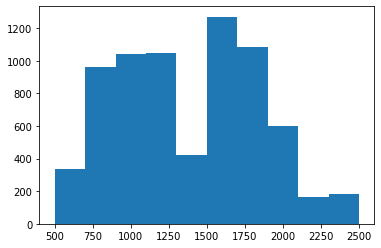

In [ ]:
plt.hist(df.INT_SQFT)

##DIST_MAINROAD-CONTINUOUS FEATURE

In [ ]:
df.DIST_MAINROAD

0       131
1        26
2        70
3        14
4        84
       ... 
7104     51
7105     52
7106    152
7107     40
7108    156
Name: DIST_MAINROAD, Length: 7109, dtype: int64

In [ ]:
df.DIST_MAINROAD.isnull().unique()

array([False])

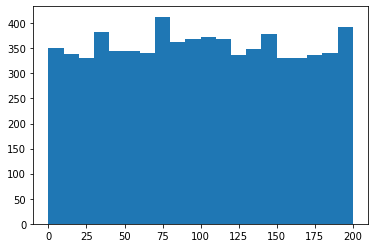

In [ ]:
plt.hist(df.DIST_MAINROAD,bins=20);

##N_BEDROOM -ORDINAL FEATURES

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7108 non-null   float64       
 6   N_BATHROOM     7104 non-null   float64       
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

In [ ]:
df.N_BEDROOM.unique()

array([ 1.,  2.,  3.,  4., nan])

In [ ]:
df.N_BEDROOM.isna().unique()

array([False,  True])

In [ ]:
df.N_BEDROOM.value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [ ]:
df.N_BEDROOM.isna().sum()

1

In [ ]:
np.median(df.N_BEDROOM.dropna())

1.0

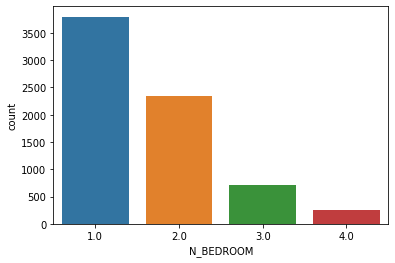

In [ ]:
sns.countplot(x="N_BEDROOM",data=df)

In [ ]:
df.N_BEDROOM.fillna(np.median(df.N_BEDROOM.dropna()),inplace=True)

In [ ]:
df.N_BEDROOM.unique()

array([1., 2., 3., 4.])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7109 non-null   float64       
 6   N_BATHROOM     7104 non-null   float64       
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

In [ ]:
df.N_BEDROOM=df.N_BEDROOM.convert_dtypes(convert_floating=True)

In [ ]:
df.dtypes

PRT_ID                   object
AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 Int64
N_BATHROOM              float64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
dtype: object

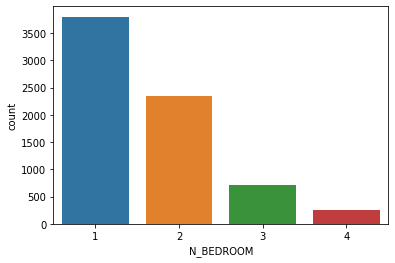

In [ ]:
sns.countplot(x="N_BEDROOM",data=df)

##N_BATHROOM -ORDINAL FEATURES

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7109 non-null   Int64         
 6   N_BATHROOM     7104 non-null   float64       
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

In [ ]:
df.N_BATHROOM.unique()

array([ 1.,  2., nan])

In [ ]:
df.N_BATHROOM.fillna(np.median(df.N_BATHROOM.dropna()),inplace=True)

In [ ]:
df.N_BATHROOM=df.N_BATHROOM.convert_dtypes(convert_floating=True)

In [ ]:
df.dtypes

PRT_ID                   object
AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 Int64
N_BATHROOM                Int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
dtype: object

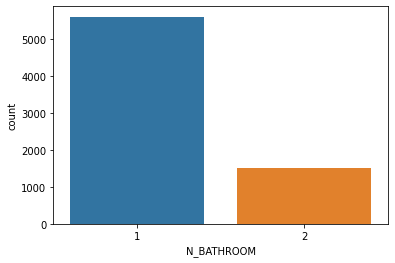

In [ ]:
sns.countplot(x="N_BATHROOM",data=df);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7109 non-null   Int64         
 6   N_BATHROOM     7109 non-null   Int64         
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

##N_ROOM -ORDINAL FEATURES

In [ ]:
df.N_ROOM.isna().unique()

array([False])

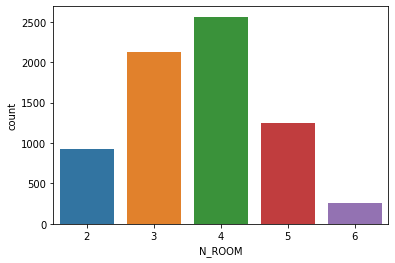

In [ ]:
sns.countplot(x="N_ROOM",data=df);

In [ ]:
df.N_ROOM=df.N_ROOM.convert_dtypes(convert_floating=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7109 non-null   Int64         
 6   N_BATHROOM     7109 non-null   Int64         
 7   N_ROOM         7109 non-null   Int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

##DF=[QS_ROOMS	,QS_BATHROOM,	QS_BEDROOM,	QS_OVERALL]

In [ ]:
df.loc[:, 'QS_ROOMS':'QS_OVERALL']

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL
0,4.0,3.9,4.9,4.330
1,4.9,4.2,2.5,3.765
2,4.1,3.8,2.2,3.090
3,4.7,3.9,3.6,4.010
4,3.0,2.5,4.1,3.290
...,...,...,...,...
7104,3.0,2.2,2.4,2.520
7105,3.6,4.5,3.3,3.920
7106,4.3,4.2,2.9,3.840
7107,4.6,3.8,4.1,4.160


In [ ]:
df.loc[:, 'QS_ROOMS':'QS_OVERALL'].isnull().sum()

QS_ROOMS        0
QS_BATHROOM     0
QS_BEDROOM      0
QS_OVERALL     48
dtype: int64

In [ ]:
df.loc[:, 'QS_ROOMS':'QS_OVERALL'].isna().sum()

QS_ROOMS        0
QS_BATHROOM     0
QS_BEDROOM      0
QS_OVERALL     48
dtype: int64

In [ ]:
df.QS_OVERALL.isnull().value_counts()

False    7061
True       48
Name: QS_OVERALL, dtype: int64

In [ ]:
df.QS_OVERALL.fillna(np.median(df.QS_OVERALL.dropna()),inplace=True) ## avearge qs

In [ ]:
df.loc[:, 'QS_ROOMS':'QS_OVERALL'].isna().sum()

QS_ROOMS       0
QS_BATHROOM    0
QS_BEDROOM     0
QS_OVERALL     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7109 non-null   Int64         
 6   N_BATHROOM     7109 non-null   Int64         
 7   N_ROOM         7109 non-null   Int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

##DROPPING- NON DOMAIN IMPORTANCE FEATURE- 03 NOS FEATURE DROPPED

* PRT_ID
* REG_FEE
* COMMIS

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().unique()

array([False])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7109 non-null   Int64         
 6   N_BATHROOM     7109 non-null   Int64         
 7   N_ROOM         7109 non-null   Int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

In [ ]:
df.drop(["PRT_ID","REG_FEE","COMMIS"],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   object        
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7109 non-null   Int64         
 5   N_BATHROOM     7109 non-null   Int64         
 6   N_ROOM         7109 non-null   Int64         
 7   SALE_COND      7109 non-null   object        
 8   PARK_FACIL     7109 non-null   object        
 9   DATE_BUILD     7109 non-null   datetime64[ns]
 10  BUILDTYPE      7109 non-null   object        
 11  UTILITY_AVAIL  7109 non-null   object        
 12  STREET         7109 non-null   object        
 13  MZZONE         7109 non-null   object        
 14  QS_ROOMS       7109 non-null   float64       
 15  QS_BATHROOM    7109 n

In [ ]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,KARAPAKKAM,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,ANNA NAGAR,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,ADYAR,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,VELACHERY,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,NoSeWa,Paved,I,4.7,3.9,3.6,4.010,9630290
4,KARAPAKKAM,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   object        
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7109 non-null   Int64         
 5   N_BATHROOM     7109 non-null   Int64         
 6   N_ROOM         7109 non-null   Int64         
 7   SALE_COND      7109 non-null   object        
 8   PARK_FACIL     7109 non-null   object        
 9   DATE_BUILD     7109 non-null   datetime64[ns]
 10  BUILDTYPE      7109 non-null   object        
 11  UTILITY_AVAIL  7109 non-null   object        
 12  STREET         7109 non-null   object        
 13  MZZONE         7109 non-null   object        
 14  QS_ROOMS       7109 non-null   float64       
 15  QS_BATHROOM    7109 n

##CONVERTING TIMESTAMP INTO AGE OF THE PROPERTY

In [ ]:
df.DATE_BUILD

0      1967-05-15
1      1995-12-22
2      1992-09-02
3      1988-03-18
4      1979-10-13
          ...    
7104   1962-01-15
7105   1995-11-04
7106   1978-01-09
7107   1977-11-08
7108   1961-07-24
Name: DATE_BUILD, Length: 7109, dtype: datetime64[ns]

In [ ]:
yr=pd.DatetimeIndex(df.DATE_BUILD).year

In [ ]:
yr

Int64Index([1967, 1995, 1992, 1988, 1979, 2009, 1979, 1996, 1977, 1991,
            ...
            1971, 1985, 1974, 1990, 1986, 1962, 1995, 1978, 1977, 1961],
           dtype='int64', name='DATE_BUILD', length=7109)

In [ ]:
yr.unique()

Int64Index([1967, 1995, 1992, 1988, 1979, 2009, 1996, 1977, 1991, 1978, 1972,
            1981, 1956, 2000, 1975, 1970, 1986, 1999, 1994, 2008, 1980, 2003,
            2001, 1987, 1989, 1983, 1998, 1985, 1969, 1976, 1993, 1961, 1964,
            1982, 1997, 2007, 1973, 1968, 2006, 1971, 2004, 1966, 2005, 1952,
            1990, 2002, 1974, 1984, 1959, 2010, 1955, 1962, 1953, 1960, 1965,
            1958, 1963, 1957, 1954, 1949, 1951, 1950],
           dtype='int64', name='DATE_BUILD')

In [ ]:
yr.value_counts()

1985    200
1988    197
2002    194
1990    191
1999    189
       ... 
1954     11
2010      9
1951      6
1949      2
1950      2
Name: DATE_BUILD, Length: 62, dtype: int64

In [ ]:
df.groupby(pd.DatetimeIndex(df.DATE_BUILD).year)["SALES_PRICE"].mean()

DATE_BUILD
1949    1.288525e+07
1950    6.761640e+06
1951    9.470893e+06
1952    9.603261e+06
1953    9.387892e+06
            ...     
2006    1.094184e+07
2007    1.124737e+07
2008    1.274462e+07
2009    1.320975e+07
2010    1.002291e+07
Name: SALES_PRICE, Length: 62, dtype: float64

In [ ]:
df.groupby(pd.DatetimeIndex(df.DATE_BUILD).year)["SALES_PRICE"].mean().reset_index()

,DATE_BUILD,SALES_PRICE
0,1949,1.288525e+07
1,1950,6.761640e+06
2,1951,9.470893e+06
3,1952,9.603261e+06
4,1953,9.387892e+06
...,...,...
57,2006,1.094184e+07
58,2007,1.124737e+07
59,2008,1.274462e+07
60,2009,1.320975e+07


In [ ]:
df.groupby(pd.DatetimeIndex(df.DATE_BUILD).year)["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")

,DATE_BUILD,SALES_PRICE
1,1950,6.761640e+06
11,1960,7.967706e+06
13,1962,8.801768e+06
12,1961,8.846287e+06
14,1963,9.170291e+06
...,...,...
52,2001,1.158360e+07
47,1996,1.166618e+07
59,2008,1.274462e+07
0,1949,1.288525e+07


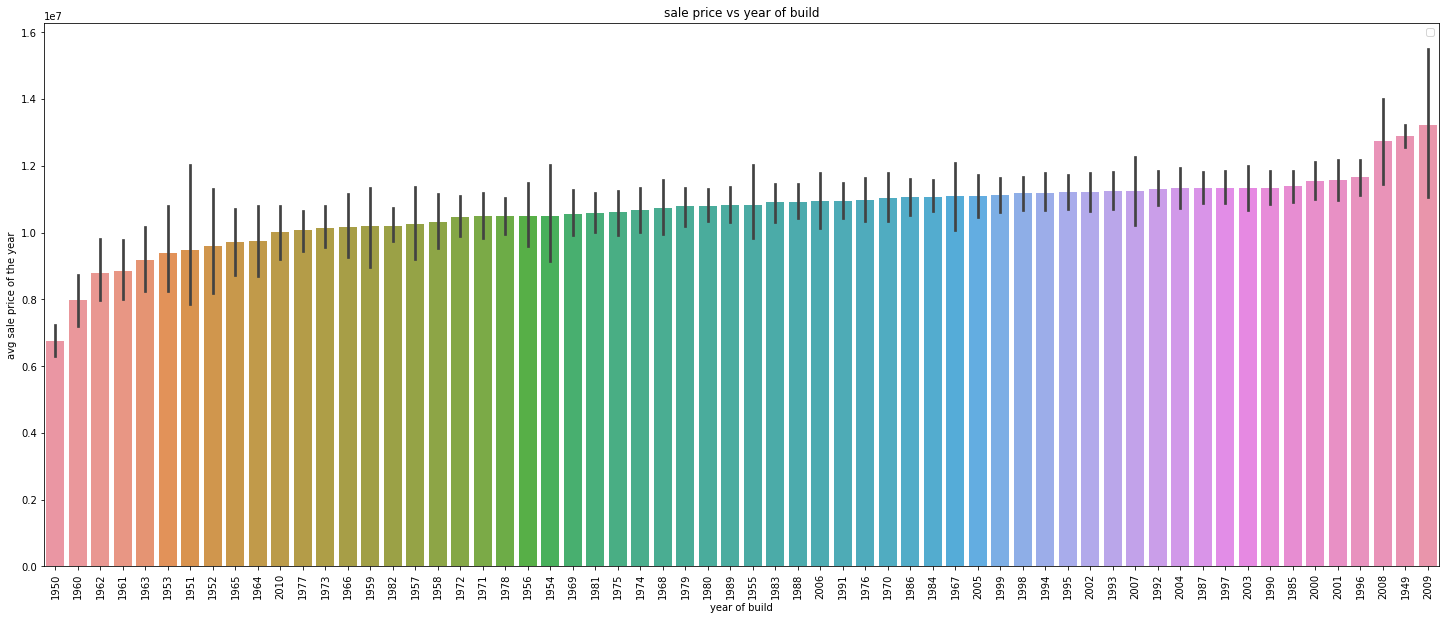

In [ ]:
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(10)
sns.barplot(data=df,x=pd.DatetimeIndex(df.DATE_BUILD).year,y='SALES_PRICE',order=df.groupby(pd.DatetimeIndex(df.DATE_BUILD).year)["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")['DATE_BUILD'])
plt.xlabel("year of build")
plt.ylabel("avg sale price of the year")
plt.title("sale price vs year of build")
plt.legend()
plt.xticks(rotation=90)
plt.show()


In [ ]:
def days(x):
  d=pd.Timestamp.today()-x
  return d.days

In [ ]:
df.DATE_BUILD=df['DATE_BUILD'].apply(days)

In [ ]:
df.DATE_SALE=df['DATE_SALE'].apply(days)

In [ ]:
df.DATE_BUILD

0       20222
1        9774
2       10980
3       12609
4       15688
        ...  
7104    22168
7105     9822
7106    16330
7107    16392
7108    22343
Name: DATE_BUILD, Length: 7109, dtype: int64

#CLEANED DATAFRAME

In [ ]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,KARAPAKKAM,1004,4191,131,1,1,3,AbNormal,Yes,20222,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,ANNA NAGAR,1986,5759,26,2,1,5,AbNormal,No,9774,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,ADYAR,909,3828,70,1,1,3,AbNormal,Yes,10980,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,VELACHERY,1855,4579,14,3,2,5,Family,No,12609,Others,NoSeWa,Paved,I,4.7,3.9,3.6,4.010,9630290
4,KARAPAKKAM,1226,4886,84,1,1,3,AbNormal,Yes,15688,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   int64  
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7109 non-null   Int64  
 5   N_BATHROOM     7109 non-null   Int64  
 6   N_ROOM         7109 non-null   Int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   int64  
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  QS_ROOMS       7109 non-null   float64
 15  QS_BATHROOM    7109 non-null   float64
 16  QS_BEDROOM     7109 non-null   float64
 17  QS_OVERALL     7109 non-null   float64
 18  SALES_PR

#EDA-INDIVIDUAL CAT FEATURE

In [ ]:
df.select_dtypes(include=['object']).columns

Index(['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE'],
      dtype='object')

In [ ]:
def countplot(dframe,col):
  f = plt.figure()
  f.set_figwidth(10)
  f.set_figheight(6)
  sns.countplot(data=dframe,x=col,label="count")
  plt.xlabel(col)
  plt.ylabel("COUNT")
  plt.title(col+" VS  COUNT")
  plt.legend()
  plt.xticks(rotation=20)
  return plt.show()


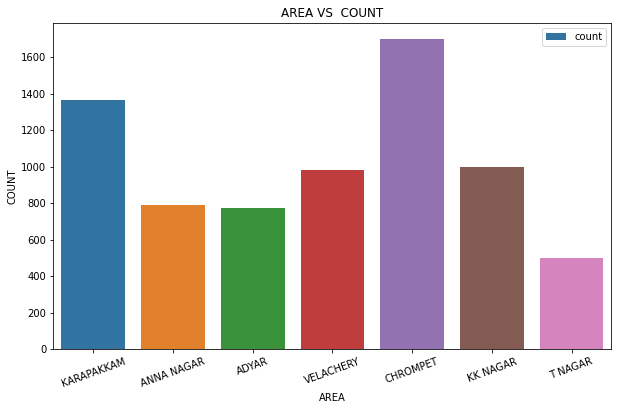

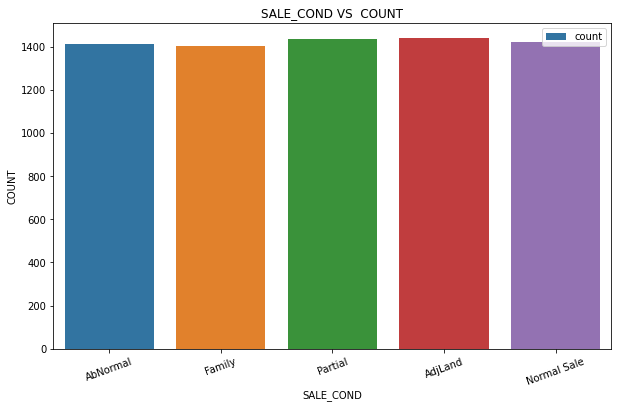

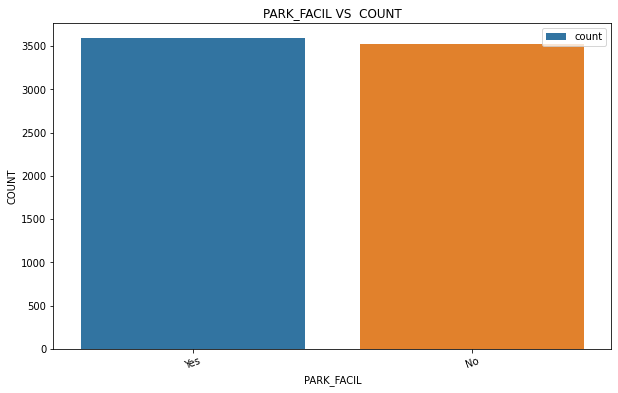

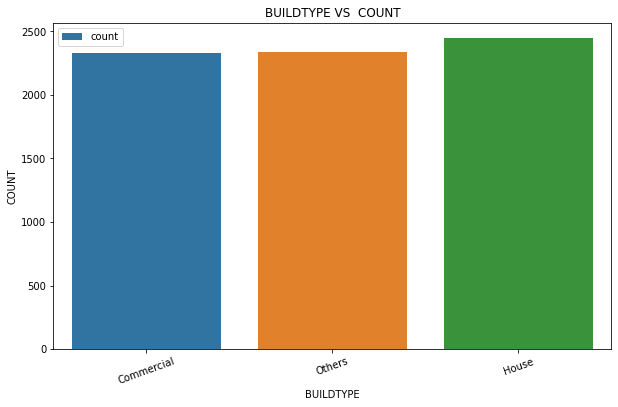

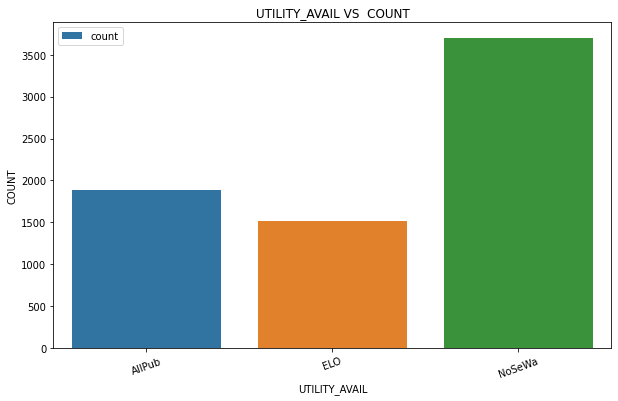

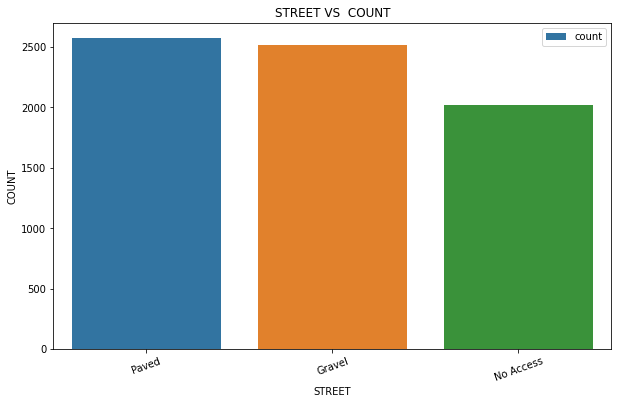

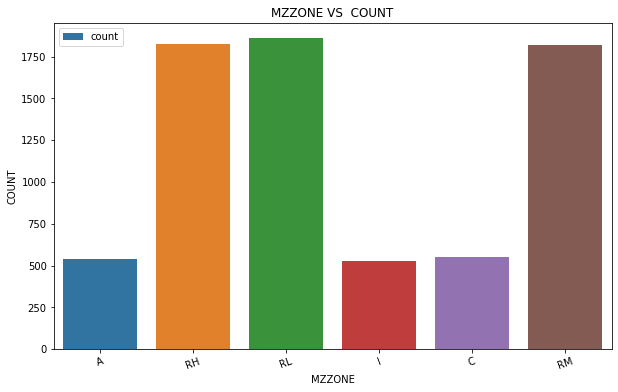

In [ ]:
for x in df.select_dtypes(include=['object']).columns:
   countplot(df,x)
   print("\n")

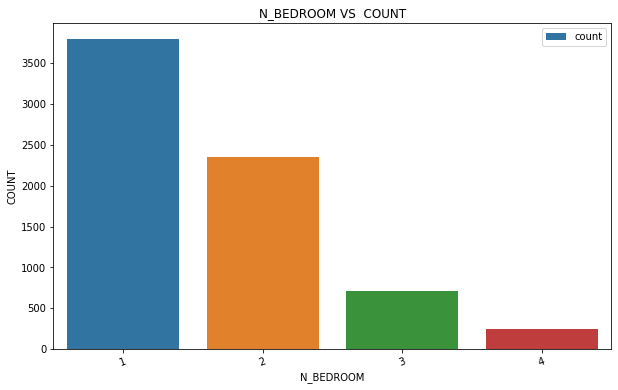

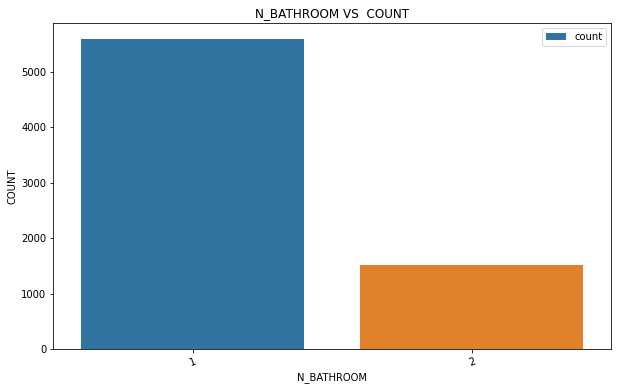

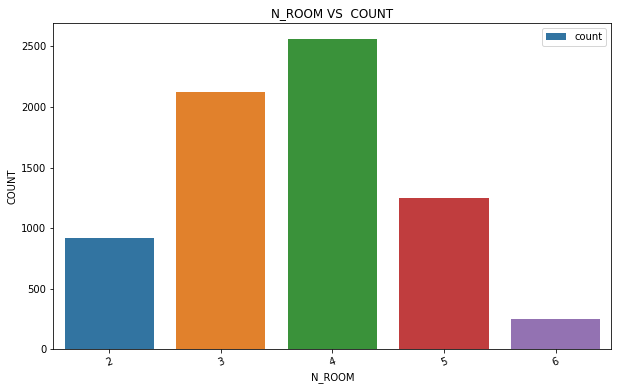

In [ ]:
for x in ['N_BEDROOM','N_BATHROOM','N_ROOM']:
  countplot(df,x)
  print("\n")

# EDA INDIVIDUAL CONTINUOUS FEATURE

In [ ]:
def contplot(dframe):
  fig,ax=plt.subplots(1,3)
  fig.set_figwidth(15)
  fig.set_figheight(9)
  ax[0].hist(dframe)
  ax[1].boxplot(dframe)
  ax[2].violinplot(dframe)
  ax[0].set_xlabel("BIN RANGE")
  ax[0].set_ylabel("COUNT")
  ax[1].set_xlabel("VALUES")
  ax[1].set_ylabel("RANGES")
  plt.title(str(dframe.name)+"  PLOT")
  return plt.show()

In [ ]:
df.select_dtypes(include=['int64','float64']).columns

Index(['INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'DATE_BUILD', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   int64  
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7109 non-null   Int64  
 5   N_BATHROOM     7109 non-null   Int64  
 6   N_ROOM         7109 non-null   Int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   int64  
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  QS_ROOMS       7109 non-null   float64
 15  QS_BATHROOM    7109 non-null   float64
 16  QS_BEDROOM     7109 non-null   float64
 17  QS_OVERALL     7109 non-null   float64
 18  SALES_PR

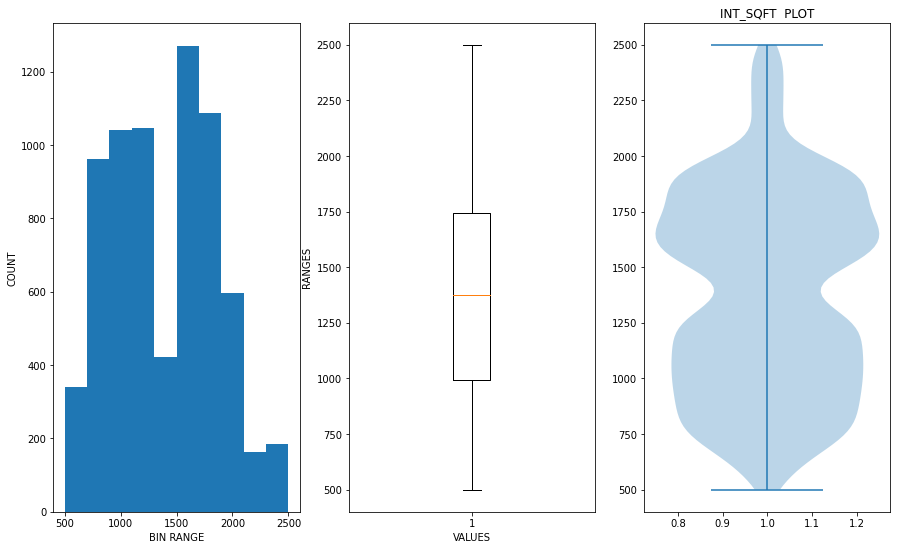

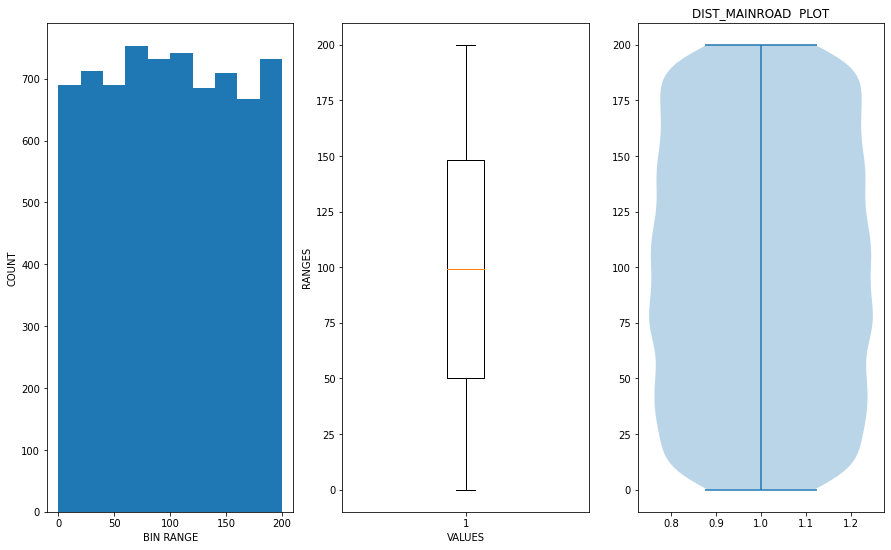

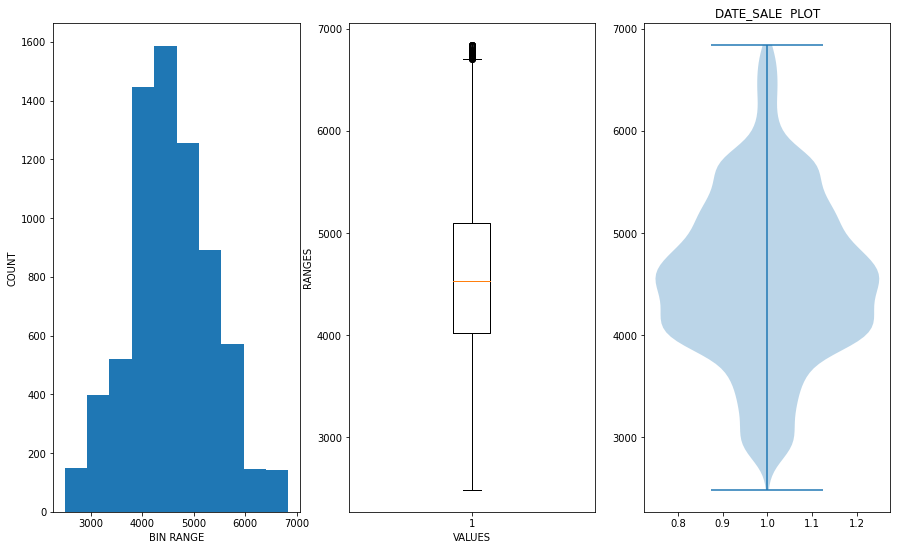

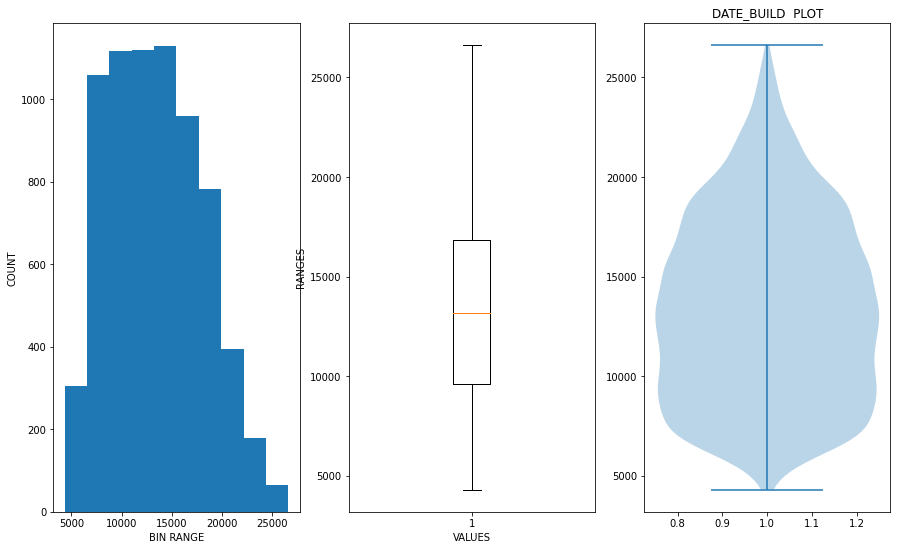

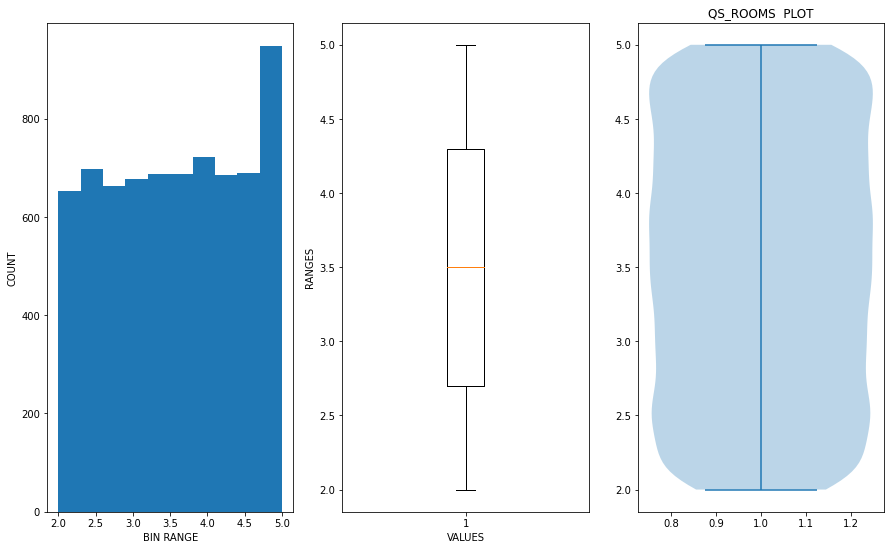

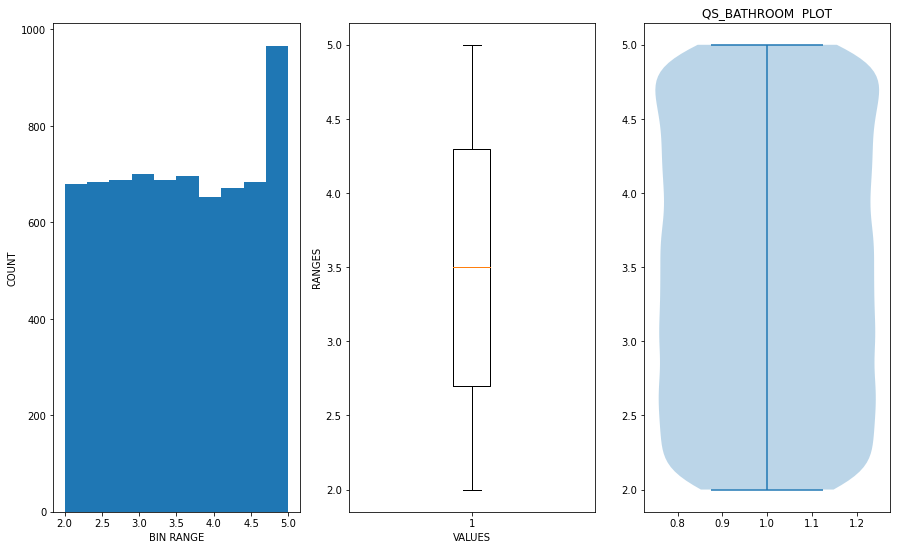

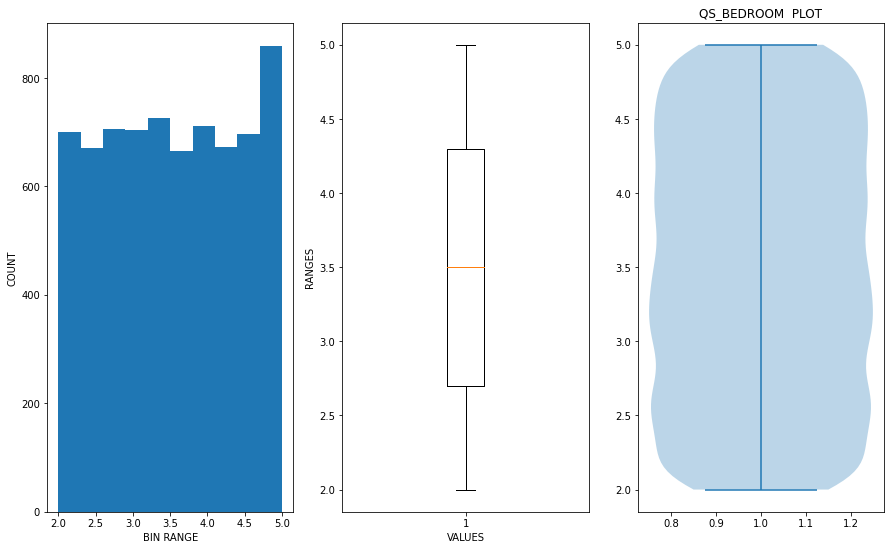

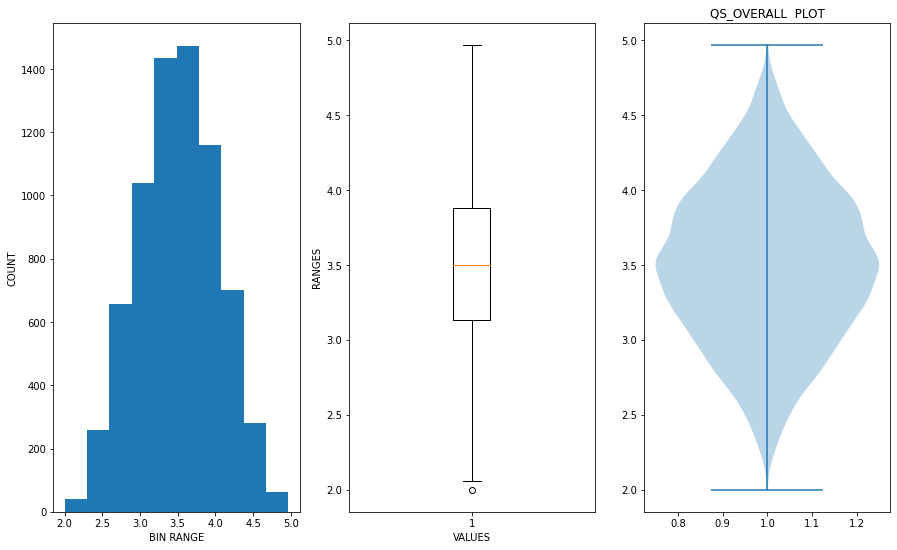

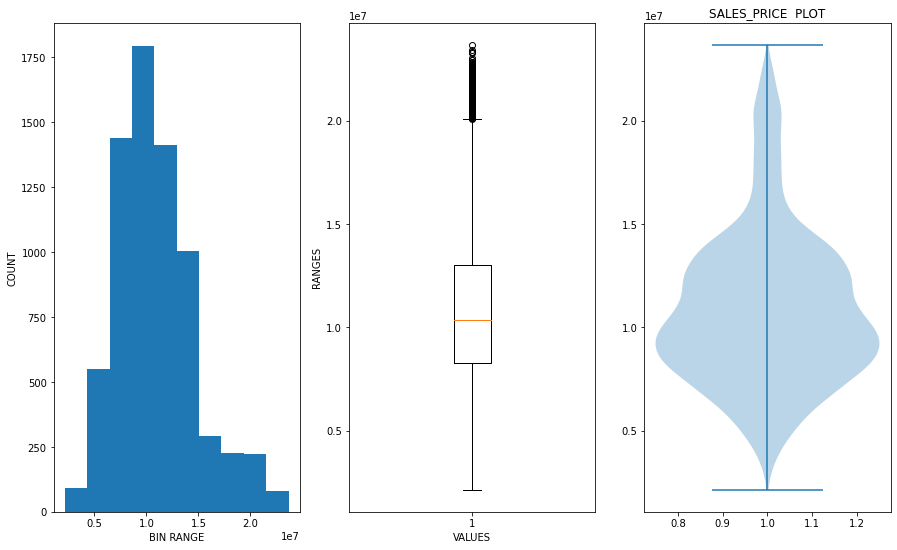

In [ ]:
for x in ['INT_SQFT', 'DIST_MAINROAD',"DATE_SALE", 'DATE_BUILD', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE']:
  contplot(df[x])

#EDA-INDIVIDUAL CAT FEATURE VS TARGET LABELS

In [ ]:
def sortplot(dframe,col):
  f = plt.figure()
  f.set_figwidth(10)
  f.set_figheight(6)
  # sns.countplot(data=dframe,x=col,label="count")
  sns.barplot(data=df,x=col,y='SALES_PRICE',order=df.groupby(col)["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")[col])
  plt.xlabel(col)
  plt.ylabel("COUNT")
  plt.title(col+" VS  COUNT")
  plt.legend()
  plt.xticks(rotation=20)
  return plt.show()


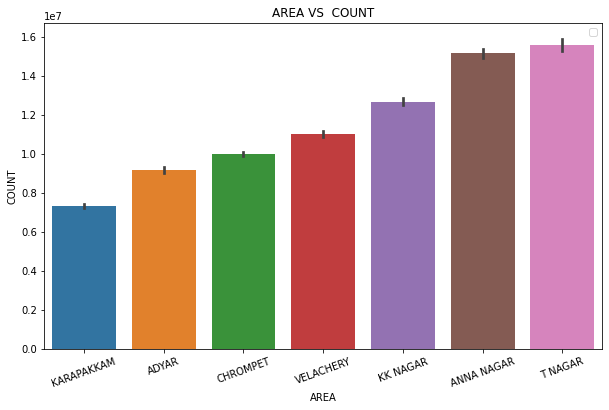

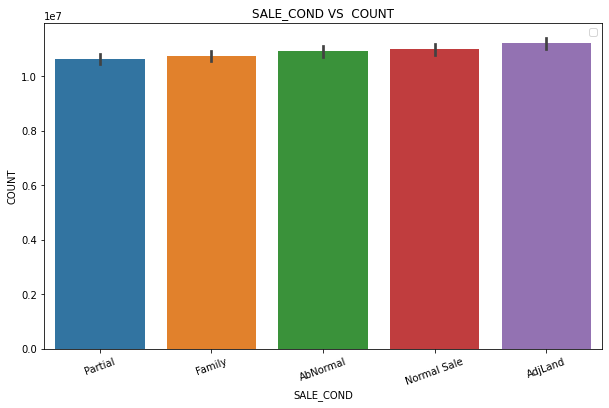

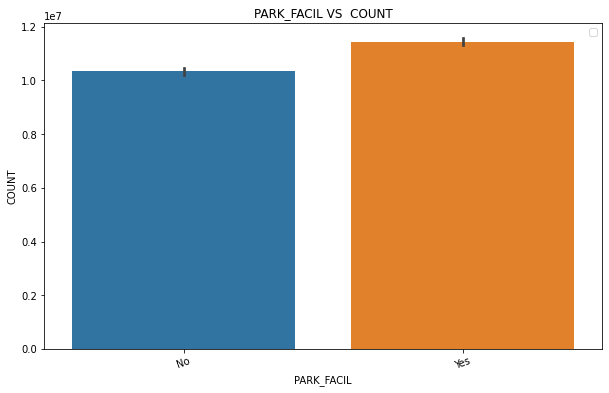

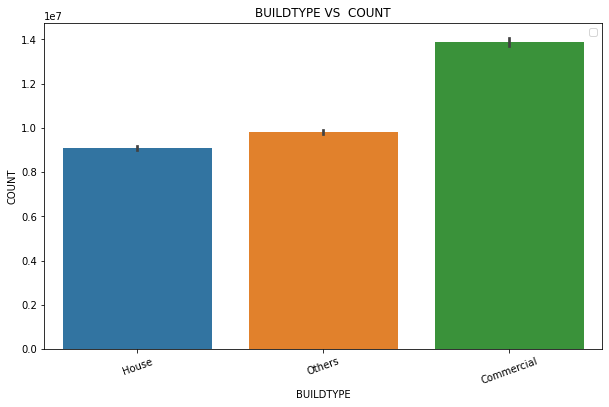

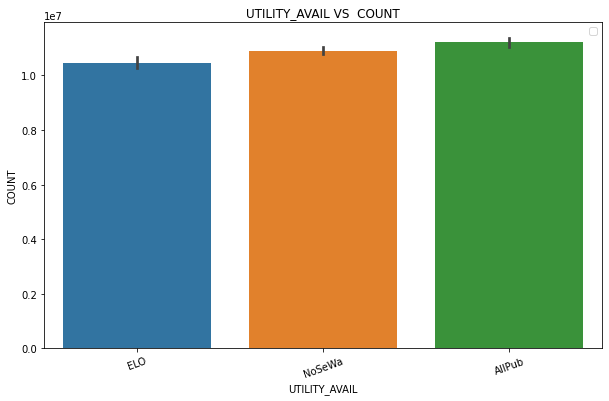

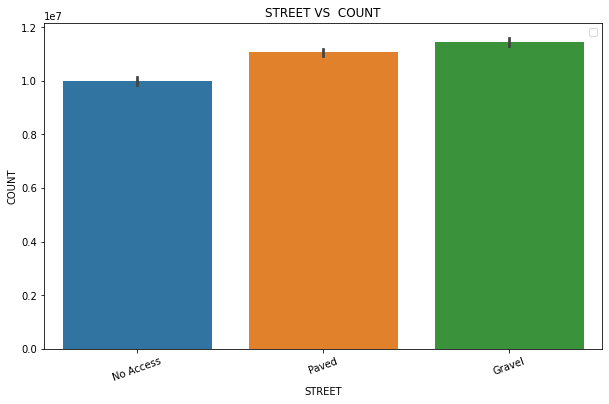

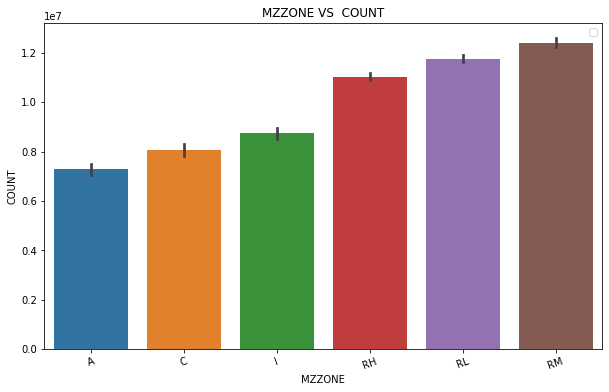

In [ ]:
for x in df.select_dtypes(include=['object']).columns:
   sortplot(df,x)
   print("\n")

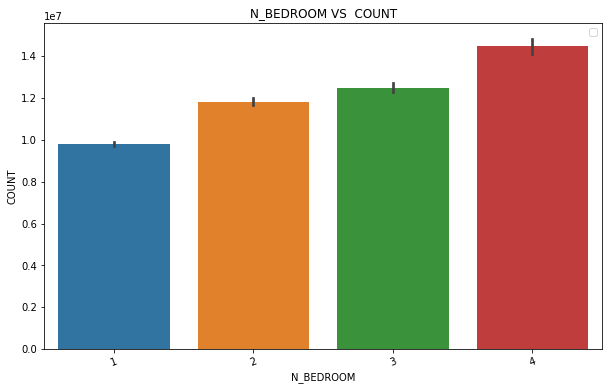

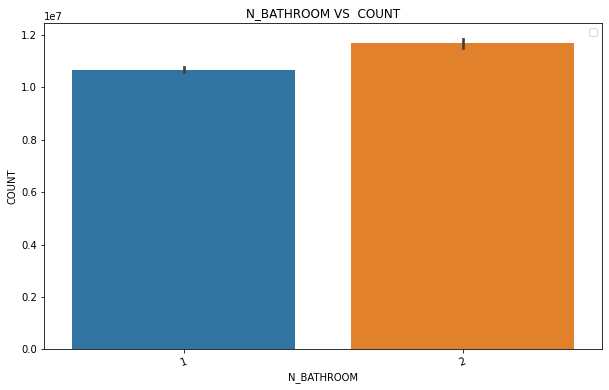

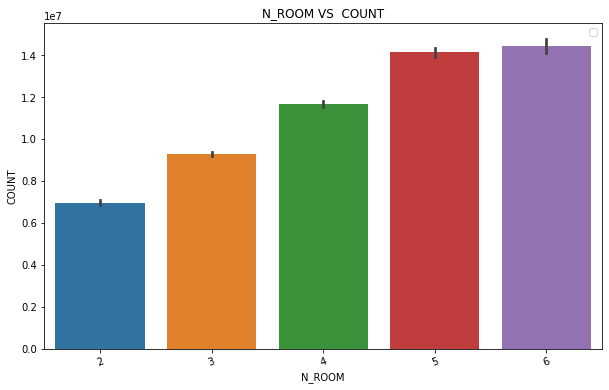

In [ ]:
for x in ['N_BEDROOM','N_BATHROOM','N_ROOM']:
  sortplot(df,x)
  print("\n")

In [ ]:
df.groupby("AREA")["SALES_PRICE"].mean()

AREA
ADYAR         9.185668e+06
ANNA NAGAR    1.516820e+07
CHROMPET      1.001381e+07
KARAPAKKAM    7.340100e+06
KK NAGAR      1.269623e+07
T NAGAR       1.561674e+07
VELACHERY     1.104735e+07
Name: SALES_PRICE, dtype: float64

In [ ]:
df.groupby("AREA")["SALES_PRICE"].mean().reset_index()

,AREA,SALES_PRICE
0,ADYAR,9.185668e+06
1,ANNA NAGAR,1.516820e+07
2,CHROMPET,1.001381e+07
3,KARAPAKKAM,7.340100e+06
4,KK NAGAR,1.269623e+07
5,T NAGAR,1.561674e+07
6,VELACHERY,1.104735e+07


In [ ]:
df.groupby(["AREA","BUILDTYPE"])["SALES_PRICE"].mean().reset_index()

,AREA,BUILDTYPE,SALES_PRICE
0,ADYAR,Commercial,1.151977e+07
1,ADYAR,House,7.973683e+06
2,ADYAR,Others,8.209260e+06
3,ANNA NAGAR,Commercial,1.994195e+07
4,ANNA NAGAR,House,1.240600e+07
5,ANNA NAGAR,Others,1.347352e+07
6,CHROMPET,Commercial,1.238855e+07
7,CHROMPET,House,8.553965e+06
8,CHROMPET,Others,9.154363e+06
9,KARAPAKKAM,Commercial,9.166997e+06


In [ ]:
df.groupby(["AREA","BUILDTYPE"])["SALES_PRICE"].std().reset_index()

,AREA,BUILDTYPE,SALES_PRICE
0,ADYAR,Commercial,2.112488e+06
1,ADYAR,House,1.579419e+06
2,ADYAR,Others,1.643272e+06
3,ANNA NAGAR,Commercial,1.542694e+06
4,ANNA NAGAR,House,1.172570e+06
5,ANNA NAGAR,Others,1.182406e+06
6,CHROMPET,Commercial,1.584982e+06
7,CHROMPET,House,1.124770e+06
8,CHROMPET,Others,1.193720e+06
9,KARAPAKKAM,Commercial,2.254814e+06


In [ ]:
df.groupby("AREA")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")

,AREA,SALES_PRICE
3,KARAPAKKAM,7.340100e+06
0,ADYAR,9.185668e+06
2,CHROMPET,1.001381e+07
6,VELACHERY,1.104735e+07
4,KK NAGAR,1.269623e+07
1,ANNA NAGAR,1.516820e+07
5,T NAGAR,1.561674e+07


In [ ]:
df.groupby("AREA")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["AREA"]

3    KARAPAKKAM
0         ADYAR
2      CHROMPET
6     VELACHERY
4      KK NAGAR
1    ANNA NAGAR
5       T NAGAR
Name: AREA, dtype: object

#EDA INDIVIDUAL CONTINUOUS FEATURES VS TARGET LABELS

In [ ]:
def scattplot(dframe,col):
  f = plt.figure()
  f.set_figwidth(10)
  f.set_figheight(6)
  # sns.countplot(data=dframe,x=col,label="count")
  # sns.relplot(x=col,y="SALES_PRICE",data=dframe,kind="scatter")
  sns.regplot(x=col,y="SALES_PRICE", data=dframe, order=1, marker="+");
  plt.xlabel(col)
  plt.ylabel("Sale price")
  plt.title(col+" VS  sale price")
  plt.legend()
  plt.xticks(rotation=20)
  return plt.show()

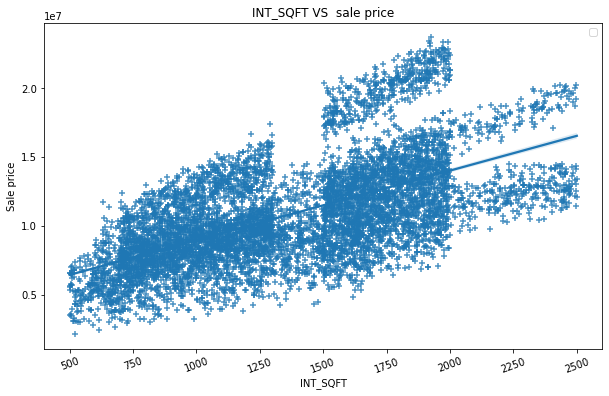

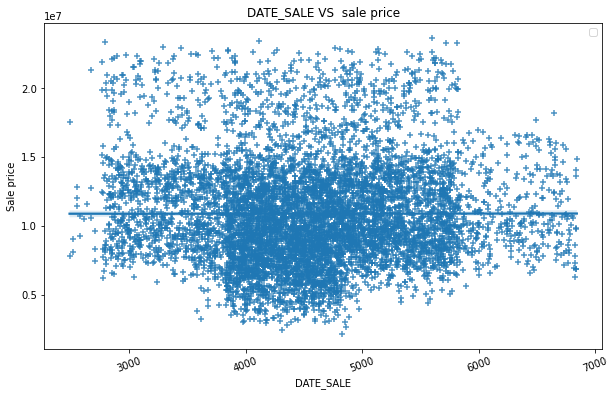

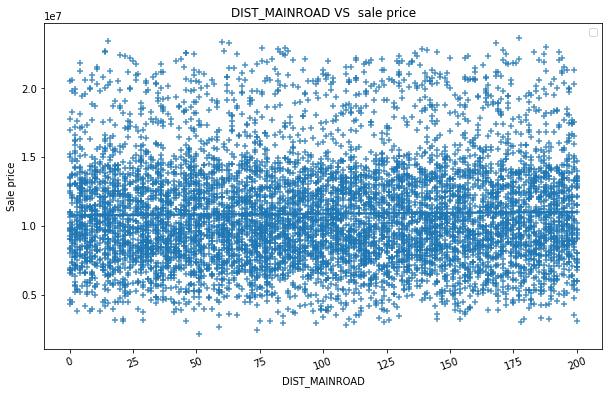

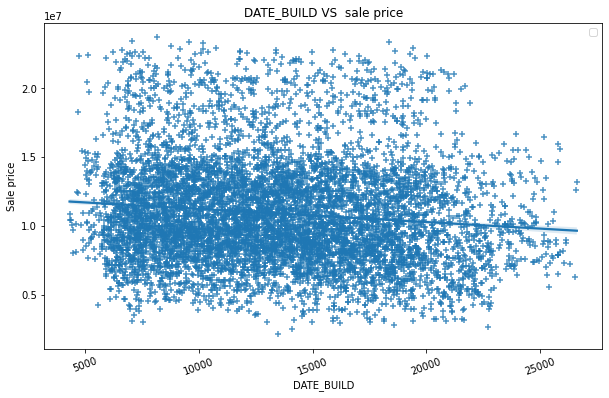

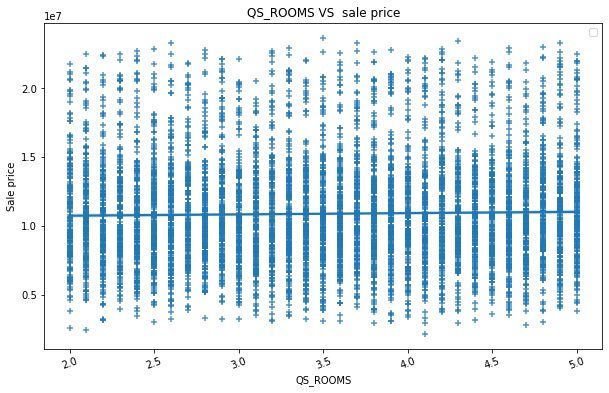

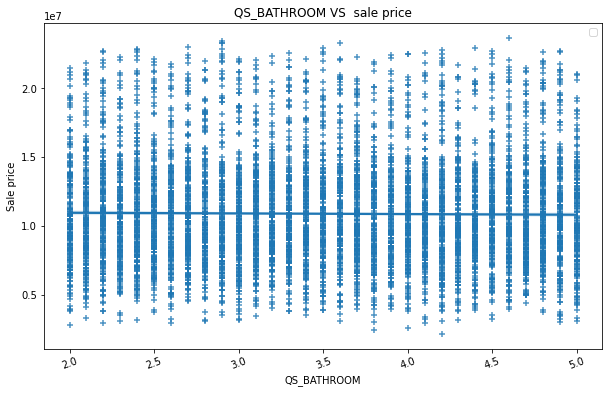

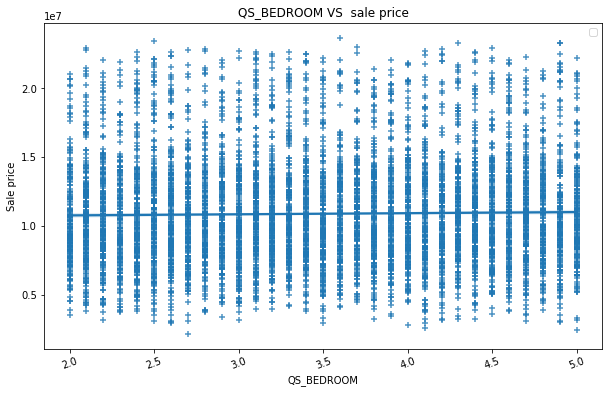

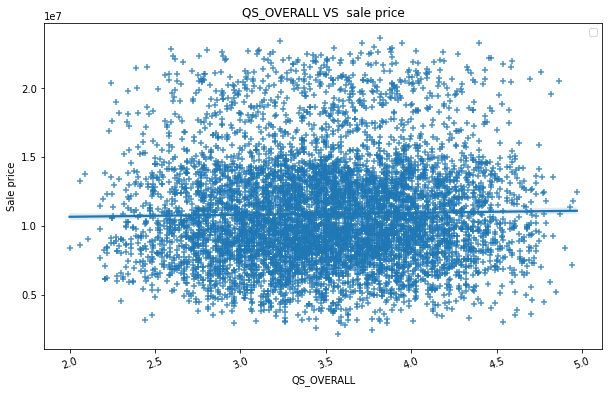

In [ ]:
for x in ['INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'DATE_BUILD', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM','QS_OVERALL']:
  scattplot(df,x)

#LINEARITY CHECK

In [ ]:
sf=df[['INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'DATE_BUILD', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM','QS_OVERALL','SALES_PRICE']]

In [ ]:
sf.corr()

,INT_SQFT,DATE_SALE,DIST_MAINROAD,DATE_BUILD,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
INT_SQFT,1.000000,0.126754,0.002022,0.009413,0.019850,-0.008337,0.008865,0.013979,0.612125
DATE_SALE,0.126754,1.000000,-0.011988,0.225616,-0.005395,0.000857,-0.002487,0.000338,0.000684
DIST_MAINROAD,0.002022,-0.011988,1.000000,-0.005384,0.002237,-0.029468,0.001554,-0.017258,0.018783
DATE_BUILD,0.009413,0.225616,-0.005384,1.000000,0.018311,0.021397,-0.018023,0.012183,-0.116251
QS_ROOMS,0.019850,-0.005395,0.002237,0.018311,1.000000,0.008828,0.007789,0.516143,0.021967
QS_BATHROOM,-0.008337,0.000857,-0.029468,0.021397,0.008828,1.000000,-0.011745,0.549046,-0.011377
QS_BEDROOM,0.008865,-0.002487,0.001554,-0.018023,0.007789,-0.011745,1.000000,0.628167,0.018804
QS_OVERALL,0.013979,0.000338,-0.017258,0.012183,0.516143,0.549046,0.628167,1.000000,0.020474
SALES_PRICE,0.612125,0.000684,0.018783,-0.116251,0.021967,-0.011377,0.018804,0.020474,1.000000


In [ ]:
sf.corr().style.background_gradient(cmap='Reds')

,INT_SQFT,DATE_SALE,DIST_MAINROAD,DATE_BUILD,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
INT_SQFT,1.000000,0.126754,0.002022,0.009413,0.019850,-0.008337,0.008865,0.013979,0.612125
DATE_SALE,0.126754,1.000000,-0.011988,0.225616,-0.005395,0.000857,-0.002487,0.000338,0.000684
DIST_MAINROAD,0.002022,-0.011988,1.000000,-0.005384,0.002237,-0.029468,0.001554,-0.017258,0.018783
DATE_BUILD,0.009413,0.225616,-0.005384,1.000000,0.018311,0.021397,-0.018023,0.012183,-0.116251
QS_ROOMS,0.019850,-0.005395,0.002237,0.018311,1.000000,0.008828,0.007789,0.516143,0.021967
QS_BATHROOM,-0.008337,0.000857,-0.029468,0.021397,0.008828,1.000000,-0.011745,0.549046,-0.011377
QS_BEDROOM,0.008865,-0.002487,0.001554,-0.018023,0.007789,-0.011745,1.000000,0.628167,0.018804
QS_OVERALL,0.013979,0.000338,-0.017258,0.012183,0.516143,0.549046,0.628167,1.000000,0.020474
SALES_PRICE,0.612125,0.000684,0.018783,-0.116251,0.021967,-0.011377,0.018804,0.020474,1.000000


In [ ]:
df.corr().style.background_gradient(cmap='Reds')

,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,DATE_BUILD,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
INT_SQFT,1.000000,0.126754,0.002022,0.786263,0.515290,0.951279,0.009413,0.019850,-0.008337,0.008865,0.013979,0.612125
DATE_SALE,0.126754,1.000000,-0.011988,0.187566,0.105322,0.112070,0.225616,-0.005395,0.000857,-0.002487,0.000338,0.000684
DIST_MAINROAD,0.002022,-0.011988,1.000000,-0.002723,0.001850,0.002301,-0.005384,0.002237,-0.029468,0.001554,-0.017258,0.018783
N_BEDROOM,0.786263,0.187566,-0.002723,1.000000,0.755207,0.840209,-0.012383,0.014948,-0.007534,0.015752,0.014240,0.330987
N_BATHROOM,0.515290,0.105322,0.001850,0.755207,1.000000,0.568541,-0.001650,0.013376,-0.012043,0.013191,0.007959,0.108834
N_ROOM,0.951279,0.112070,0.002301,0.840209,0.568541,1.000000,-0.013404,0.016524,-0.007545,0.015072,0.015406,0.602760
DATE_BUILD,0.009413,0.225616,-0.005384,-0.012383,-0.001650,-0.013404,1.000000,0.018311,0.021397,-0.018023,0.012183,-0.116251
QS_ROOMS,0.019850,-0.005395,0.002237,0.014948,0.013376,0.016524,0.018311,1.000000,0.008828,0.007789,0.516143,0.021967
QS_BATHROOM,-0.008337,0.000857,-0.029468,-0.007534,-0.012043,-0.007545,0.021397,0.008828,1.000000,-0.011745,0.549046,-0.011377
QS_BEDROOM,0.008865,-0.002487,0.001554,0.015752,0.013191,0.015072,-0.018023,0.007789,-0.011745,1.000000,0.628167,0.018804


In [ ]:
df.corr().style.bar()

,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,DATE_BUILD,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
INT_SQFT,1.000000,0.126754,0.002022,0.786263,0.515290,0.951279,0.009413,0.019850,-0.008337,0.008865,0.013979,0.612125
DATE_SALE,0.126754,1.000000,-0.011988,0.187566,0.105322,0.112070,0.225616,-0.005395,0.000857,-0.002487,0.000338,0.000684
DIST_MAINROAD,0.002022,-0.011988,1.000000,-0.002723,0.001850,0.002301,-0.005384,0.002237,-0.029468,0.001554,-0.017258,0.018783
N_BEDROOM,0.786263,0.187566,-0.002723,1.000000,0.755207,0.840209,-0.012383,0.014948,-0.007534,0.015752,0.014240,0.330987
N_BATHROOM,0.515290,0.105322,0.001850,0.755207,1.000000,0.568541,-0.001650,0.013376,-0.012043,0.013191,0.007959,0.108834
N_ROOM,0.951279,0.112070,0.002301,0.840209,0.568541,1.000000,-0.013404,0.016524,-0.007545,0.015072,0.015406,0.602760
DATE_BUILD,0.009413,0.225616,-0.005384,-0.012383,-0.001650,-0.013404,1.000000,0.018311,0.021397,-0.018023,0.012183,-0.116251
QS_ROOMS,0.019850,-0.005395,0.002237,0.014948,0.013376,0.016524,0.018311,1.000000,0.008828,0.007789,0.516143,0.021967
QS_BATHROOM,-0.008337,0.000857,-0.029468,-0.007534,-0.012043,-0.007545,0.021397,0.008828,1.000000,-0.011745,0.549046,-0.011377
QS_BEDROOM,0.008865,-0.002487,0.001554,0.015752,0.013191,0.015072,-0.018023,0.007789,-0.011745,1.000000,0.628167,0.018804


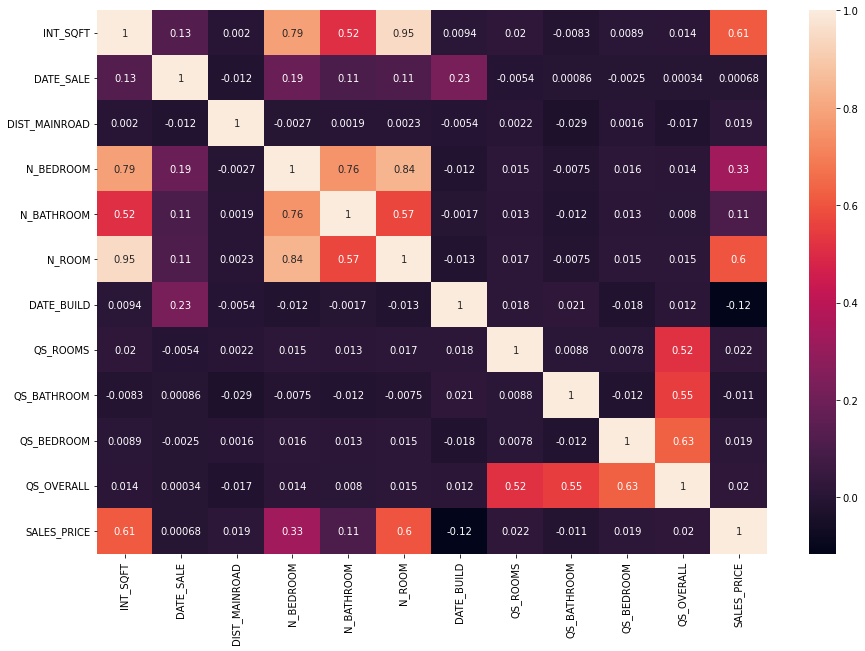

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15, 10)
sns.heatmap(df.corr(), annot=True);

# INFERENCE FROM EDA

**CATGORICAL FEATURES**

DROPPING CAT FEATURES AS IT IS UNIFORM
*   SALE_COND

DROPPING CAT FEATURES AS IT IS NON LINEAR


1.   DATE_SALE
2.   DIST_MAINROAD
3.   QS_ROOMS
4.   QS_BATHROOM
5.   QS_BEDROOM
6.   QS_OVERALL






# DROPPING FEATURES AFTER INFERENCE FROM EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   int64  
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7109 non-null   Int64  
 5   N_BATHROOM     7109 non-null   Int64  
 6   N_ROOM         7109 non-null   Int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   int64  
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  QS_ROOMS       7109 non-null   float64
 15  QS_BATHROOM    7109 non-null   float64
 16  QS_BEDROOM     7109 non-null   float64
 17  QS_OVERALL     7109 non-null   float64
 18  SALES_PR

In [ ]:
df.drop(["SALE_COND","DATE_SALE","DIST_MAINROAD","QS_ROOMS","QS_BATHROOM","QS_BEDROOM","QS_OVERALL"],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   AREA           7109 non-null   object
 1   INT_SQFT       7109 non-null   int64 
 2   N_BEDROOM      7109 non-null   Int64 
 3   N_BATHROOM     7109 non-null   Int64 
 4   N_ROOM         7109 non-null   Int64 
 5   PARK_FACIL     7109 non-null   object
 6   DATE_BUILD     7109 non-null   int64 
 7   BUILDTYPE      7109 non-null   object
 8   UTILITY_AVAIL  7109 non-null   object
 9   STREET         7109 non-null   object
 10  MZZONE         7109 non-null   object
 11  SALES_PRICE    7109 non-null   int64 
dtypes: Int64(3), int64(3), object(6)
memory usage: 1000.9+ KB


In [ ]:
df.describe()

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,DATE_BUILD,SALES_PRICE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,1.636939,1.213110,3.688704,13420.461668,1.089491e+07
std,457.410902,0.802881,0.409534,1.019099,4619.683564,3.768603e+06
min,500.000000,1.000000,1.000000,2.000000,4306.000000,2.156875e+06
25%,993.000000,1.000000,1.000000,3.000000,9584.000000,8.272100e+06
50%,1373.000000,1.000000,1.000000,4.000000,13162.000000,1.033505e+07
75%,1744.000000,2.000000,1.000000,4.000000,16848.000000,1.299390e+07
max,2500.000000,4.000000,2.000000,6.000000,26630.000000,2.366734e+07


In [ ]:
df.to_csv('cleaned.csv')

#ENCODE-01

In [ ]:
temp = df #ENCODE

In [ ]:
dfT=temp

In [ ]:
dfT

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE
0,KARAPAKKAM,1004,1,1,3,Yes,20222,Commercial,AllPub,Paved,A,7600000
1,ANNA NAGAR,1986,2,1,5,No,9774,Commercial,AllPub,Gravel,RH,21717770
2,ADYAR,909,1,1,3,Yes,10980,Commercial,ELO,Gravel,RL,13159200
3,VELACHERY,1855,3,2,5,No,12609,Others,NoSeWa,Paved,I,9630290
4,KARAPAKKAM,1226,1,1,3,Yes,15688,Others,AllPub,Gravel,C,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...
7104,KARAPAKKAM,598,1,1,2,No,22168,Others,ELO,No Access,RM,5353000
7105,VELACHERY,1897,3,2,5,Yes,9822,Others,NoSeWa,No Access,RH,10818480
7106,VELACHERY,1614,2,1,4,No,16330,House,NoSeWa,Gravel,I,8351410
7107,KARAPAKKAM,787,1,1,2,Yes,16392,Commercial,ELO,Paved,RL,8507000


In [ ]:

# Label encode features


dfT["AREA"] = dfT["AREA"].map({'KARAPAKKAM':0, 'ANNA NAGAR':5, 'ADYAR':1, 'CHROMPET':2, 'KK NAGAR':4,'T NAGAR':6, 'VELACHERY':3})
dfT["PARK_FACIL"] = dfT["PARK_FACIL"].map({'No':0, 'Yes':1})
# dfT["BUILDTYPE"] = dfT["BUILDTYPE"].map({'Commercial':2, 'House':0, 'Others':1})
dfT["UTILITY_AVAIL"] = dfT["UTILITY_AVAIL"].map({'AllPub':2, 'ELO':0,'NoSeWa':1})
# dfT["STREET"] = dfT["STREET"].map({'Gravel':2, 'No Access':0, 'Paved':1})               
dfT["MZZONE"] = dfT["MZZONE"].map({'A':0, 'C':1, 'I':2, 'RH':3, 'RL':4, 'RM':5})   
   
              

#one hot encode features

# dfT = pd.get_dummies(dfT,columns = ["AREA"])
# dfT = pd.get_dummies(dfT,columns = ["SALE_COND"]) 
dfT = pd.get_dummies(dfT,columns = ["STREET"]) 
dfT = pd.get_dummies(dfT,columns = ["BUILDTYPE"])

In [ ]:
dfT.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,DATE_BUILD,UTILITY_AVAIL,MZZONE,SALES_PRICE,STREET_Gravel,STREET_No Access,STREET_Paved,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,0,1004,1,1,3,1,20222,2,0,7600000,0,0,1,1,0,0
1,5,1986,2,1,5,0,9774,2,3,21717770,1,0,0,1,0,0
2,1,909,1,1,3,1,10980,0,4,13159200,1,0,0,1,0,0
3,3,1855,3,2,5,0,12609,1,2,9630290,0,0,1,0,0,1
4,0,1226,1,1,3,1,15688,2,1,7406250,1,0,0,0,0,1


In [ ]:
dfT.head().isnull().sum()

AREA                    0
INT_SQFT                0
N_BEDROOM               0
N_BATHROOM              0
N_ROOM                  0
PARK_FACIL              0
DATE_BUILD              0
UTILITY_AVAIL           0
MZZONE                  0
SALES_PRICE             0
STREET_Gravel           0
STREET_No Access        0
STREET_Paved            0
BUILDTYPE_Commercial    0
BUILDTYPE_House         0
BUILDTYPE_Others        0
dtype: int64

In [ ]:
dfT.dtypes

AREA                    int64
INT_SQFT                int64
N_BEDROOM               Int64
N_BATHROOM              Int64
N_ROOM                  Int64
PARK_FACIL              int64
DATE_BUILD              int64
UTILITY_AVAIL           int64
MZZONE                  int64
SALES_PRICE             int64
STREET_Gravel           uint8
STREET_No Access        uint8
STREET_Paved            uint8
BUILDTYPE_Commercial    uint8
BUILDTYPE_House         uint8
BUILDTYPE_Others        uint8
dtype: object

In [ ]:
dfT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   AREA                  7109 non-null   int64
 1   INT_SQFT              7109 non-null   int64
 2   N_BEDROOM             7109 non-null   Int64
 3   N_BATHROOM            7109 non-null   Int64
 4   N_ROOM                7109 non-null   Int64
 5   PARK_FACIL            7109 non-null   int64
 6   DATE_BUILD            7109 non-null   int64
 7   UTILITY_AVAIL         7109 non-null   int64
 8   MZZONE                7109 non-null   int64
 9   SALES_PRICE           7109 non-null   int64
 10  STREET_Gravel         7109 non-null   uint8
 11  STREET_No Access      7109 non-null   uint8
 12  STREET_Paved          7109 non-null   uint8
 13  BUILDTYPE_Commercial  7109 non-null   uint8
 14  BUILDTYPE_House       7109 non-null   uint8
 15  BUILDTYPE_Others      7109 non-null   uint8
dtypes: Int

#SPLIT

In [ ]:
dfT.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'DATE_BUILD', 'UTILITY_AVAIL', 'MZZONE', 'SALES_PRICE', 'STREET_Gravel',
       'STREET_No Access', 'STREET_Paved', 'BUILDTYPE_Commercial',
       'BUILDTYPE_House', 'BUILDTYPE_Others'],
      dtype='object')

In [ ]:
train=list(dfT.columns)
train.remove('SALES_PRICE')

In [ ]:
dfT['SALES_PRICE']

0        7600000
1       21717770
2       13159200
3        9630290
4        7406250
          ...   
7104     5353000
7105    10818480
7106     8351410
7107     8507000
7108     9976480
Name: SALES_PRICE, Length: 7109, dtype: int64

In [ ]:
dfT['SALES_PRICE'].values

array([ 7600000, 21717770, 13159200, ...,  8351410,  8507000,  9976480])

In [ ]:
dfT[train].values

array([[0, 1004, 1, ..., 1, 0, 0],
       [5, 1986, 2, ..., 1, 0, 0],
       [1, 909, 1, ..., 1, 0, 0],
       ...,
       [3, 1614, 2, ..., 0, 1, 0],
       [0, 787, 1, ..., 1, 0, 0],
       [3, 1896, 3, ..., 0, 0, 1]], dtype=object)

In [ ]:
#Split my data
x_train, x_test, y_train, y_test = train_test_split(dfT[train].values,
                                                    dfT['SALES_PRICE'].values, 
                                                    test_size=0.25,
                                                    random_state=1, 
                                                    shuffle=True, 
                                                    stratify=None)

In [ ]:
x_test.shape,x_train.shape,y_train.shape,y_test.shape

((1778, 15), (5331, 15), (5331,), (1778,))

#SCALE

In [ ]:
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

#LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

In [ ]:
regressor.coef_

array([ 1061071.44570801,   643186.38007368, -1243061.65521164,
         112271.81119431,  1751655.63858239,   520464.65081039,
        -219031.47173802,    39006.52176861,   875727.84979923,
         221006.4220526 ,  -226044.90538758,    -8105.05767435,
        1358835.73631031,  -834582.74175344,  -509500.5524266 ])

In [ ]:
len(regressor.coef_)

15

In [ ]:
len(dfT[train].columns)

15

In [ ]:
regressor.intercept_

10882554.99906209

In [ ]:
y_pred = regressor.predict(x_test)
y_pred 

array([17115346.15566177,  7131962.22564871,  6173854.0036697 , ...,
       17070135.18522925, 14963630.28746924, 12631237.863438  ])

In [ ]:
from sklearn import metrics
print('R2 SCORE:', metrics.r2_score(y_test,y_pred))

R2 SCORE: 0.9229465330229458


In [ ]:
pd.DataFrame(index=dfT[train].columns,data=regressor.coef_,columns=["coeff"]).sort_values(by = 'coeff',ascending = False)

,coeff
N_ROOM,1.751656e+06
BUILDTYPE_Commercial,1.358836e+06
AREA,1.061071e+06
MZZONE,8.757278e+05
INT_SQFT,6.431864e+05
PARK_FACIL,5.204647e+05
STREET_Gravel,2.210064e+05
N_BATHROOM,1.122718e+05
UTILITY_AVAIL,3.900652e+04
STREET_Paved,-8.105058e+03


## CROSS VALIDATION

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_validate
regressor = LinearRegression(normalize = True) #untrained model
cv_results = cross_validate(regressor, dfT[train].values, dfT['SALES_PRICE'].values, cv=10, scoring = "r2")
cv_results['test_score'].mean()

0.9189371570752838

#KNN REGRESSOR

K value  :  1  train score :  0.9841587209351575  test score :  0.943925627333666
K value  :  2  train score :  0.9841587209351575  test score :  0.943925627333666
K value  :  3  train score :  0.9841587209351575  test score :  0.943925627333666
K value  :  4  train score :  0.9841587209351575  test score :  0.943925627333666
K value  :  5  train score :  0.9841587209351575  test score :  0.943925627333666
K value  :  6  train score :  0.9841587209351575  test score :  0.943925627333666
K value  :  7  train score :  0.9841587209351575  test score :  0.943925627333666
K value  :  8  train score :  0.9841587209351575  test score :  0.943925627333666
K value  :  9  train score :  0.9841587209351575  test score :  0.943925627333666
K value  :  10  train score :  0.9841587209351575  test score :  0.943925627333666
K value  :  20  train score :  0.9841587209351575  test score :  0.943925627333666
K value  :  50  train score :  0.9841587209351575  test score :  0.943925627333666
K value  :  1

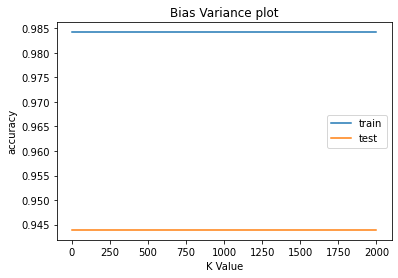

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
hyp=[]
xaxis=[]
yaxis=[]
for i in [1,2,3,4,5,6,7,8,9,10,20,50,100,150.300,500,1000,2000]:
  knn= KNeighborsRegressor(n_neighbors=2)
  knn.fit(x_train,y_train) # training the model
  print("K value  : " , i, " train score : ", knn.score(x_train,y_train) , " test score : ", np.mean(cross_val_score(knn, x_train, y_train, cv=10))) #predicting using the model
  hyp.append(i)
  xaxis.append(knn.score(x_train,y_train))
  yaxis.append(np.mean(cross_val_score(knn, x_train, y_train, cv=10)))


plt.plot(hyp,xaxis,label="train")
plt.plot(hyp,yaxis,label="test")
plt.xlabel("K Value")
plt.ylabel("accuracy")
plt.title("Bias Variance plot")
plt.legend()
plt.show()

In [ ]:
knn= KNeighborsRegressor(n_neighbors=2)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
y_pred

array([18734060.,  5966625.,  7980675., ..., 16239000., 14270335.,
       13073110.])

In [ ]:
from sklearn import metrics
print('R2 SCORE:', metrics.r2_score(y_test,y_pred))

R2 SCORE: 0.9456788422019812


In [ ]:
A = knn.kneighbors_graph()
A.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# DECISION TREE REGRESSOR

Depth :  1  Train R2 :  0.36230926269520913  Val Score :  0.3601704584433486
Depth :  2  Train R2 :  0.6845366109000379  Val Score :  0.6831623950131777
Depth :  3  Train R2 :  0.8026808735466631  Val Score :  0.8011651932678172
Depth :  4  Train R2 :  0.8867724694289723  Val Score :  0.8814856430666607
Depth :  5  Train R2 :  0.922102005587638  Val Score :  0.9147025441018399
Depth :  6  Train R2 :  0.9443297462933089  Val Score :  0.9358394924039659
Depth :  7  Train R2 :  0.9600955621397553  Val Score :  0.9492500555967996
Depth :  8  Train R2 :  0.9729464257818614  Val Score :  0.959233760297584
Depth :  9  Train R2 :  0.9827244990058618  Val Score :  0.9657952444981266
Depth :  10  Train R2 :  0.9896186095870205  Val Score :  0.9696399276865041
Depth :  11  Train R2 :  0.9940832540712325  Val Score :  0.9711180890661024
Depth :  12  Train R2 :  0.9970472669092685  Val Score :  0.9718931138416973
Depth :  13  Train R2 :  0.99864508168101  Val Score :  0.9717681803177994
Depth :  14

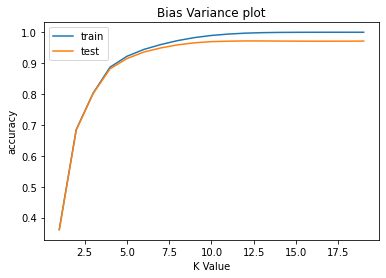

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer

hyp=[]
xaxis=[]
yaxis=[]

for depth in range(1,20):
  dt = DecisionTreeRegressor(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(x_train, y_train) # the model is trained
  trainAccuracy = dt.score(x_train, y_train)
  valAccuracy = np.mean(cross_val_score(dt, x_train, y_train, cv=10)) 
  print("Depth : ",depth, " Train R2 : ",trainAccuracy, " Val Score : ", valAccuracy)
  hyp.append(depth)
  xaxis.append(trainAccuracy)
  yaxis.append(valAccuracy)

plt.plot(hyp,xaxis,label="train")
plt.plot(hyp,yaxis,label="test")
plt.xlabel("K Value")
plt.ylabel("accuracy")
plt.title("Bias Variance plot")
plt.legend()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=13)

# Fit dt to the training set
dt.fit(x_train, y_train)
dt.predict(x_test)

array([18963740. ,  5918812.5,  6795830. , ..., 15598600. , 14305750. ,
       11882723. ])

In [ ]:
from sklearn.metrics import  r2_score

# Compute y_pred
y_pred = dt.predict(x_test)

# Compute mse_dt
rsquared = r2_score(y_test,y_pred)
# Compute rmse_dt


# Print rmse_dt
print("Test set R2 of dt: {:.2f}".format(rsquared))

Test set R2 of dt: 0.98


In [ ]:
x_test

array([[ 0.79562655,  2.14602665,  2.92847182, ...,  1.44150774,
        -0.7268996 , -0.70084864],
       [-1.37504139, -0.56910403, -0.79628162, ..., -0.69371809,
         1.37570581, -0.70084864],
       [-0.28970742, -1.41429794, -0.79628162, ..., -0.69371809,
         1.37570581, -0.70084864],
       ...,
       [ 0.79562655,  0.74466888,  0.44530286, ...,  1.44150774,
        -0.7268996 , -0.70084864],
       [ 1.88096053,  1.23733372,  0.44530286, ..., -0.69371809,
        -0.7268996 ,  1.42684161],
       [ 0.25295957,  0.6351878 ,  0.44530286, ...,  1.44150774,
        -0.7268996 , -0.70084864]])

In [ ]:
# importance = dt.feature_importances_
# list(zip(importance,train))


# Get numerical feature importances
importances = list(dt.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(train, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: AREA                 Importance: 0.48
Variable: BUILDTYPE_Commercial Importance: 0.32
Variable: INT_SQFT             Importance: 0.12
Variable: MZZONE               Importance: 0.04
Variable: PARK_FACIL           Importance: 0.02
Variable: DATE_BUILD           Importance: 0.01
Variable: STREET_No Access     Importance: 0.01
Variable: N_BEDROOM            Importance: 0.0
Variable: N_BATHROOM           Importance: 0.0
Variable: N_ROOM               Importance: 0.0
Variable: UTILITY_AVAIL        Importance: 0.0
Variable: STREET_Gravel        Importance: 0.0
Variable: STREET_Paved         Importance: 0.0
Variable: BUILDTYPE_House      Importance: 0.0
Variable: BUILDTYPE_Others     Importance: 0.0


In [ ]:
# from sklearn import tree
# tree.plot_tree(dt)

In [ ]:
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=800)
# tree.plot_tree(dt,
#                feature_names = train,
#                filled = True);
# fig.savefig('dt.png')

#RANDOM FOREST

Max depth  :  1  train score :  0.3952118463126759  test score :  0.394043103630616
Max depth  :  4  train score :  0.8498525628193202  test score :  0.8507491100289071
Max depth  :  7  train score :  0.9569990835955731  test score :  0.9518574627921117
Max depth  :  10  train score :  0.9869862090531245  test score :  0.9775044458347081
Max depth  :  13  train score :  0.9959414179514041  test score :  0.9839668697950424
Max depth  :  16  train score :  0.997801193993083  test score :  0.9852472449853746
Max depth  :  19  train score :  0.9979462198413468  test score :  0.9851516744322563
Max depth  :  22  train score :  0.9979455233328444  test score :  0.9850690493881251
Max depth  :  25  train score :  0.9979265495990983  test score :  0.9853123454680919
Max depth  :  28  train score :  0.997845345432158  test score :  0.985090550092473


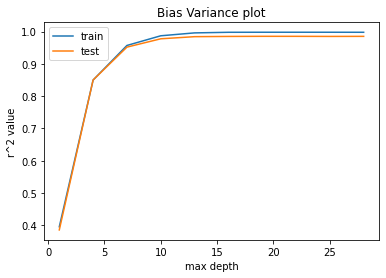

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
hyp=[]
xaxis=[]
yaxis=[]
for i in range(1,30,3):
  rf = RandomForestRegressor(n_estimators= 100, max_depth = i, max_features='sqrt')
  rf.fit(x_train, y_train)
  print("Max depth  : " , i, " train score : ", rf.score(x_train,y_train) , " test score : ", np.mean(cross_val_score(rf, x_train, y_train, cv=10))) #predicting using the model
  hyp.append(i)
  xaxis.append(rf.score(x_train,y_train))
  yaxis.append(np.mean(cross_val_score(rf, x_train, y_train, cv=10)))


plt.plot(hyp,xaxis,label="train")
plt.plot(hyp,yaxis,label="test")
plt.xlabel("max depth")
plt.ylabel("r^2 value")
plt.title("Bias Variance plot")
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators= 100, max_depth = 17, max_features='sqrt')
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=17, max_features='sqrt')

In [ ]:
y_pred_rf= rf.predict(x_test)
y_pred_rf

array([18050476.        ,  6864928.3       ,  7571543.34285714, ...,
       15863162.8       , 14349896.84166667, 12730681.85714286])

In [ ]:
print('R2 SCORE_RF:', metrics.r2_score(y_test,y_pred_rf))

R2 SCORE_RF: 0.9866159408665558


In [ ]:
# from sklearn.tree import export_graphviz
# import pydot

# # Pull out one tree from the forest
# tree = rf.estimators_[5]

# # Export the image to a dot file
# export_graphviz(tree, out_file = 'tree.dot', feature_names = train, rounded = True, precision = 1)

# # Use dot file to create a graph
# (graph, ) = pydot.graph_from_dot_file('tree.dot')

# # Write graph to a png file
# graph.write_png('tree.png');

In [ ]:

# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(train, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


# XG BOOST

Learning rate :  0.01  Train score :  -0.3848729667840678  Cross-Val score :  -0.39111027104240753
Learning rate :  0.02  Train score :  0.7456769893247832  Cross-Val score :  0.7424114116181689
Learning rate :  0.03  Train score :  0.9242852357952258  Cross-Val score :  0.9215035129207877
Learning rate :  0.04  Train score :  0.961447847908635  Cross-Val score :  0.9591678236753454
Learning rate :  0.05  Train score :  0.9737089059849976  Cross-Val score :  0.9714490172963881
Learning rate :  0.06  Train score :  0.9796266248739944  Cross-Val score :  0.9774759174676835
Learning rate :  0.07  Train score :  0.9837954140560186  Cross-Val score :  0.9817275731297643
Learning rate :  0.08  Train score :  0.9865354776932873  Cross-Val score :  0.9847292031905936
Learning rate :  0.09  Train score :  0.9883106856751049  Cross-Val score :  0.986773850416393
Learning rate :  0.1  Train score :  0.9903056823617956  Cross-Val score :  0.9883104914986653
Learning rate :  0.11  Train score :  0.

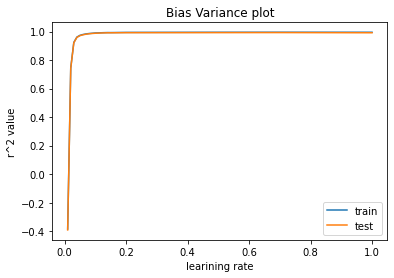

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np

hyp=[]
xaxis=[]
yaxis=[]

for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(x_train,y_train) #train the model
  model.score(x_test, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(x_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, x_train, y_train, cv=10)))
  hyp.append(lr)
  xaxis.append(model.score(x_train,y_train))
  yaxis.append(np.mean(cross_val_score(model, x_train, y_train, cv=10)))


plt.plot(hyp,xaxis,label="train")
plt.plot(hyp,yaxis,label="test")
plt.xlabel("learining rate")
plt.ylabel("r^2 value")
plt.title("Bias Variance plot")
plt.legend()
plt.show()



In [ ]:
# hyp=[]
# xaxis=[]
# yaxis=[]

# for lr in np.linspace(0.46, 0.5, num=100):
#   model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
#   model.fit(x_train,y_train) #train the model
#   model.score(x_test, y_test) # scoring the model - r2 squared
#   print("Learning rate : ", lr, " Train score : ", model.score(x_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, x_train, y_train, cv=10)))
#   hyp.append(lr)
#   xaxis.append(model.score(x_train,y_train))
#   yaxis.append(np.mean(cross_val_score(model, x_train, y_train, cv=10)))


# plt.plot(hyp,xaxis,label="train")
# plt.plot(hyp,yaxis,label="test")
# plt.xlabel("learining rate")
# plt.ylabel("r^2 value")
# plt.title("Bias Variance plot")
# plt.legend()
# plt.show()


In [ ]:
model = xgb.XGBRegressor(learning_rate = 0.8, n_estimators=100)
model.fit(x_train,y_train) #train the model
model.score(x_test, y_test)*100 # scoring the model - r2 squared

[05:22:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


99.3504968593234

In [ ]:

# Get numerical feature importances
importances = list(model.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(train, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: BUILDTYPE_Commercial Importance: 0.5099999904632568
Variable: AREA                 Importance: 0.3199999928474426
Variable: PARK_FACIL           Importance: 0.03999999910593033
Variable: MZZONE               Importance: 0.029999999329447746
Variable: INT_SQFT             Importance: 0.019999999552965164
Variable: STREET_No Access     Importance: 0.019999999552965164
Variable: BUILDTYPE_House      Importance: 0.019999999552965164
Variable: N_BATHROOM           Importance: 0.009999999776482582
Variable: STREET_Gravel        Importance: 0.009999999776482582
Variable: N_BEDROOM            Importance: 0.0
Variable: N_ROOM               Importance: 0.0
Variable: DATE_BUILD           Importance: 0.0
Variable: UTILITY_AVAIL        Importance: 0.0
Variable: STREET_Paved         Importance: 0.0
Variable: BUILDTYPE_Others     Importance: 0.0


In [ ]:
train

['AREA',
 'INT_SQFT',
 'N_BEDROOM',
 'N_BATHROOM',
 'N_ROOM',
 'PARK_FACIL',
 'DATE_BUILD',
 'UTILITY_AVAIL',
 'MZZONE',
 'STREET_Gravel',
 'STREET_No Access',
 'STREET_Paved',
 'BUILDTYPE_Commercial',
 'BUILDTYPE_House',
 'BUILDTYPE_Others']

In [ ]:
print(*model.predict([[1,2000,2,1,3,1,9772,0,1,1,0,0,1,0,0]]))

19795556.0


#BEST MODEL AND ML DEPLOYMENT

In [ ]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.2 MB 3.3 MB/s 
     |████████████████████████████████| 78 kB 5.7 MB/s 
     |████████████████████████████████| 181 kB 41.3 MB/s 
     |████████████████████████████████| 4.7 MB 26.2 MB/s 
     |████████████████████████████████| 164 kB 66.8 MB/s 
     |████████████████████████████████| 235 kB 50.3 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 51 kB 6.8 MB/s 
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=e49f9b360d31fd23cc620bdf9a00f63344e9ffd949c8711d66286a67f0424f5c
  Stored in directory: /root/.cache/pip/wheels/5f/55/ab/36a76989f7f88d9ca7b1f68da6d94252bb6a8d6ad4f18e04e9
Successfully built validators


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
st.title("CHENNAI HOUSE PRICE PREDICTION")
import pandas as pd
dfT1=pd.read_csv("/content/cleaned.csv")
#ENCODE
dfT1["AREA"] = dfT1["AREA"].map({'KARAPAKKAM':0, 'ANNA NAGAR':5, 'ADYAR':1, 'CHROMPET':2, 'KK NAGAR':4,'T NAGAR':6, 'VELACHERY':3})
dfT1["PARK_FACIL"] = dfT1["PARK_FACIL"].map({'No':0, 'Yes':1})
dfT1["UTILITY_AVAIL"] = dfT1["UTILITY_AVAIL"].map({'AllPub':2, 'ELO':0,'NoSeWa':1})           
dfT1["MZZONE"] = dfT1["MZZONE"].map({'A':0, 'C':1, 'I':2, 'RH':3, 'RL':4, 'RM':5})   
dfT1 = pd.get_dummies(dfT1,columns = ["STREET"]) 
dfT1= pd.get_dummies(dfT1,columns = ["BUILDTYPE"])
#SPLIT
train=list(dfT1.columns)
train.remove('SALES_PRICE')
train.remove(train[0])
#Split my data
x_train, x_test, y_train, y_test = train_test_split(dfT1[train].values,
                                                    dfT1['SALES_PRICE'].values,
                                                    test_size=0.25,
                                                    random_state=1,
                                                    shuffle=True,
                                                    stratify=None)
#SCALE
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)
# BEST MODEL
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")
model = xgb.XGBRegressor(learning_rate = 0.8, n_estimators=100)
model.fit(x_train,y_train)
##STREMLIT CODE
q1,q2=st.columns(2)
q1.video("https://www.youtube.com/watch?v=5IvQ3fYKnfM")
q2.image("data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAASwAAACoCAMAAABt9SM9AAAA2FBMVEX///8U6IXx8vInIyMAAAAA534A6IL08vQA53wA6IAcFxf28vUIAAAmISH78/jHx8d2dHRqhJlyip74+PhHRETm5uYVDw+amZmCgYHT2d8fGhq8xs9kgJbBytITDAzb8eWmtMDl8euUpbSdrbqn7saw7suFmara3+SwvMZw7qrM8NyI7LXD79Y96ZKzsrLk5OS879KT7btb6p4u6Y19k6VhX1/V1NTy/fdraWlWU1N566076pKf7cGdnJxr66bc+um4uLg5NjZQTU3s/fPQ+eLNzMyP7LmAfn7hNW4zAAAPQElEQVR4nO2da0PaPBTHofRKaRUQlPsdOi4OAZ0iOt2z6ff/Rk+SNm3SJlA2Abfm/2KDkpT258nJSXJSUikhISEhISEhISEhISEhISEhISEhISEhISEhISEhISGhv0k/++tFWkdSZ19u5v+d+oI+q77fzHTdUNW0J1U1FD29np76uj6fvk9UACodlarr65+nvrpPpflMZ4HyeS0Hp77CT6Ofy22oPFzCuqC+LXahcnE9n/pCP4HmSgxUUEb6+6mv9dSa6PFQQenzU1/tabWIsIIBg6IrisLoG/VE+/mFEWpqij5bbwbT8Xg6uHkGwYSwLV80K1VPT6aSbZumBmSatj2eqEqIVmL9FuWvDP15bJuaRAoQG6RpXOqpL/pEmhOsVH3dsWlSrkzzhnJrajIjiG8EBGXWYqKCsltp0tXriYxOFwEC/Y2LCjZGaUb6tuWpL/wEmgaGpU9tPipIyyZ7giTGD8ugDY7NraxgU5ypSTatgW9Y+m5WoCUm2mv5hqXPt7dBj1YraLWJ6xB/4ns31iFWGghGJRia0i7ffgviLX3X2UvX7z8yuWbm4vzpV/TT60uJU+/pshgUKvHP/0J8+HL5ddfl/KmesQ9a0m3QtKeTmaLryuN6TPeQJhFobHfx1xdyM1u1Mhmrmi3L8vkd/fGV3LTYFe/l3IX38lJuyjykqSfwIaZ6va3gBwkblj4miWh2P+1NLquGPmuRIM2Bb1pb2+FLNQc4AVBVyAsoKz9Qf/uLakZmW03TymAIP6qZ8iXvK8AXyPgvcJ7NyGd73frewjeuLshGaLaW5NhGpd2ZHXxi8M98KwNE1aZc/nF7e9GUc1mAqyqT931h8WCVA1hPzYyV43zFSy5jZfEbACt3YFhfVIZh2fPwlKk+IGzL3PjBFnc4LWWykM2PF69lSGfnchngkt+DMrFgFeVMJvfC/hJgms0n/OYIsLDtPBKmY86j84B6K4CpdfzPeU5LylYzmeYr5aSKV8DWLDk4EAtW6iqbqV4wS90Bjn6xI8DCw0JjY7JYEC1xRtAMIlPjjX3eDGAlX4WPfn3NyefB23iwShDJHasUwJN9J98dGBYOHEjDoYL0wLTmQQnzBrdD9QvztPegxcnXjA+uyYPxYKVuq5nsOaMQbKBy0GMcHpbv3wO70cbMyXiyB9Cm2P2rM9ZZz6Cf4XZhvmLC+kW1tkDA9VcfgreHh+WZCEnCXIenkD3T6hBdgM+TOTzMWNRt8BQTVurVIvx4IMuiYoXDw5q4Lc5YBy7LXjJZpZU+swzjpNc5YAox4sO4sMD5rGj0CszXyhDvDw9r7cG6MRlWE2qHXwLrs/24nzW5DCyhHHHuDMWFlYLtMMLhAcQNpAc8PCwvzCI7Q1Zf6LY4oqm++U01es6vcjzDig/rshxt1qiTJA+cBBbPstI6EYn1FT6skOPlKzYsCYIJlbwqh8z3eLCIZmgrPFhBeKHNt8C6rzL9cVSxYaXus5GGHeF3PFgxHDw5ItLGW2BVLU4QGVZ8WHfhNgedfvWWOnI0WGToYH/h5IcoBCx/BpAROsR1WXvAgqPAHBXkgk5EpmfIjtYbUs57wGmHMWFJEStIXb5f+Xp/8Q/vAQvOL7wS74GpUe9Tx4RFOG+uh48JK9JNpd7lLKHAIPaAhY4QbRs4sVxoOHWEoNSI+CPJnrBDeGX6m5Z1W7awMhliKm8fWCB6IAaI4Dsik1xHG+7QUanEdlokLDx+VB8jpyxGfNbX12bZFZy4+T1Y9FkBusj06eFh4Wk8ej6LPZRWgnkHfyTNgJXK8aZUgO5yJCzutHIUFmRR9gOSrBXtQ44Hi5qjkcwpK7mUCYsx6/AjNA4hdUbCAgVl9oJMtI+A4wJ/Chm4++ikzeFh9f2JKWohzOwsornwxtyMBYt2L7QoWLcgHmAskKWYsCBaDANSjtjuEWHRMzCSZrcmMx3mSAZJkkpMWGesW8WfkbCushwTBB2qFZlJBqet/kCvgJExJpqPMPnnw6KXd9ASq9kaT6fTzUzfDxa0i3C/jkXBum5yTJDZzOAsmdtqAWTGEsbxZkrToQUcjwnKkrS9bAhlEBMWGONSM02EKFhwEMNc5XpnmhwYoGfRAJHwXoSOCov28aRsd7UnNiwYlnKG0hQs2G8yV7kYkwz4cAoZJOvsh4c1p4Y2HR4tNNcXGxY0LU70QMMC7Sk8aIGC01esxS9wWmhwGctiTckfGZaa7rBzjkxULD4sGAdZOVYI9YuCBacJm5GFDTR5+MKoXEIDwl8yuQAW6Aiw6JzadItJyx3dMGEtmKeF3siSo2HBXYZeezhnLJlJVYu3qnoLQ4Z7TnR2vHXDwMuzckrd6as9YKWuEa0rurWUzmH6A9k+i2UrvBh71rQyvFgVGFX1IcuZhz0+rLS+6ERT2txF1X1gAVrgnsvylU+m+HIro/QHypC+omLZJ6/JFs8eEM8XzllfLbTUzWRyAlhpVZ9E8uA1NdwbjnfBSt01YR5IWW7eXl0+XZ6/yrkqNLaLkCe7k+Hhslx+OD+/x4VeeCeFi2y8sOQUsNAOizmISDVMTLOfjf1hpYrvKG0G5rGVy1kLJRxlXiLFpAeICxZDaW+gY3jdksAHM744Ae/hYX1nL9UrymIzbUk20thLficH0v4UDR8W8FFXslx2E9msajkn37Lv5QzmB7qlsk35lTcGR7qUq1nOUOpJzh44848NC1IwFF030svlUtGjKVz+5N9WWEC/Lm8tGch6uDpjxEaeStfnF6BQ7uL+aVda6OXFLa/I032sZZLfFxcWQ8TUcwArSfnK/+2EpRqGAeceDH1CpHCNBSxGU1wu1m+bfr+/uSHTSv1FVgHLxaDoi80Y7dB0RYYTfjYbJ5nt39Q33rKXsp5q4e0CgfzkQAErrSz72tatdP5KWOJhGemBvX3HE5GelSRYqSgs0Ovt2BxGLJUlG5aaHu/aG6Z1gnWfRMMyZtKuPYdmZylgIVYLbgeIzcoeq8SCYoJhqbPtZqWZducLXWN96hs4pmjLkqJ2pZnwiSGuOoPwQ6OSCyuyFgYtadp/Wz8jzVQ98tCoZMEiUrGUm9CatN16W+pgCG2ortJRJQsWceNLm0Y1XUSebSRg4UY4p/b2duI90+43YJVW3I96jT+4lcMryOOmDMuecp9pZ8DnvPq7wpiw2qNtX1mpc+dMh+0/vJ3DyodF7mNi7mX16Cg3LdPsDLxH+LBh5WvbvrKS/1thPWIDIvOVyQddhLRE62QgnnCf9sOGVfhHYfkTU2R6lr3ktUE/5U3TuJZVclZdx0Hep9IddrEbGvWGQ0eDB/OpETheoSo1usNeCcOqBB83ul1nFBRxX7YlUKSSqnh/k1GNXwl+7Lj/S2333+Gw7S5e1kbU5/FhkVudiG1MYX8VJFOaKGlQnTBg9VbDXg/eQC/vVGqFoXuD9V6jtsqD26kUGgWn0c0T11hc5Z2GU2900f2AjypOvgtf9gq1Rq/eQ0UKjUq7DisV6xWnPqykHM9Eh11UqQYq9ehKLrq6y6ZdQG+6jUYXnSa1cq+gVtgXlkImwvN270RT4VmwQDN0ramRh1dZLMBrquXRn7Fdg7AQvnY+WOUbroqIB7p8B30gQccnofuU4D9d1IdW6vA0hd4KFim6vrEEjzkFeKSUb+BKWnD2AvoTIE86qjdcfvC/4e/C0juBx2JndlOtUPL2JXJgue2j4HjMUpTPr7jcpLzfEEvuEfA/vK28i9opwAOVUJEutKJCwSXRXuF/i7jSiqzkqYEsELnKVdc91Cv8CSyF2Lyz4cai5L5zZFnGFliABio5AgY2IswIO/i8H1QhnFDQskb5EapWgVW6+V7FK4L+TEUHkW+7xSVoU0XIBldCXEAlOnZB1zPsEX8geE2/D4uIsuw1z72rz+Ed+NtglQpYEtUDRmHVMCzosyq4FmqajWEdObcaPjoka0I7Q/fKruSfHxopbJzYPgG10W/AWjBgLXiwiNQQz/62WxbRI+WD7JkdllXK0xkLxUahSxRBNXE7G9Ul98tG0Uo94h34KmeY8qwwhcvv7eD3g0U+rwaV2gYrtSKu13OyUFFYkvdyhEoVwl15pQ5bHOGIAqe0ckbu2fKsSr6AK3PrDN2u2e0uhq4D6+4NS42xO9MgFvC9fedsWJ4brbhdj9NFrxFA2G6isECMAY2wVEANo+FyaQPUNVQJunrQeaKuddigYFVWbrSBK/XaVCWsYr7nvi25EYWDOtUaOk+twB+rhoQXtcjd4jwHr0hEITcpnA2rkV91e+gOVk67UECtsVZftXt52OXjsWGdGDV368P2sC65QWmtPoTVStAV5dtO1+NQ7zq9+rCI4iy/YgG3PxB5Od75iUpYbWyulXyh1y54tIf5bnvVrZEtfKv8R0K1oslXYVbkFn2vrbJhgaDYQT5KqrXbGAl8ja6x6B1pSFSNdq2YqpToouDmnJ4j+UW8uLwR9BajoC07rEq4WB2/LzbAJeH6DVhFCkUafOGNmKTvtpmsqOcc4SchcWB9Og17u8vsFm5y5P57c8AyLZWcoMe7Xf8GWJVVb1XgZ9LtIX8uhpzOssNPh09HJui90aNx8xEXcVgVG07tQ1gFyQ4UDG0WoqUa1HYCfxu1sfmQq/hbhAfNxoSaKZ2Q8++qvqA2qgTPblOS9YMD/iN4yMAA0OpM0ugXsFT46M05nYAUhK0J+70BPwXXoFfCNNNubZ5nj7PnTSuUgWT3g8cxn/ryj6zg2crhHXSauxQdTn8gJp05m8L+XQV7yme7ko1cVsRzu/+GzvBjFTx0dBKDliYRE/QJc1mp4Kkh4N5vdtLSpEdymH3qaz++giBB32VbVCZb0qIsJGJ0oyy2Zv7Z9I+vJa0vRCJm+1SVuZfVNStpTQ0a/4aB4cfrGzm40R+nzN0Cpj1Q6UFQIg0rtEdT1ZebToiXZmv9ZWjpNYm/JIMUmpQBI5zN2Mb7dmxbmq+V8Cr1rq2G/7D6oSksMCJUZuub/mDQv/nyGM2PTKvJ+9GdQIwJPzCGNuBOQ2Z+pPrt1Fd8Sn1nQuFITSeaFfqx37islKQNoBkaKDszbpFZ6YkMsCKaxEhQ1meJGz5z9G3C6PkIwWnTU1/jZ9JgFn04omtThp5+E1YV0n/9haIrRrCnAgYRur7YCFJsfR9Mnh9VHUl9XEwGAtRufUt4QCUkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJPSx+h+fgWwZVwIDXwAAAABJRU5ErkJggg==")
f1=st.selectbox("SELECT AREA",['KARAPAKKAM','ANNA NAGAR', 'ADYAR', 'CHROMPET', 'KK NAGAR', 'T NAGAR','VELACHERY'])
f11q={'KARAPAKKAM': 0, 'ANNA NAGAR': 5, 'ADYAR': 1, 'CHROMPET': 2, 'KK NAGAR': 4, 'T NAGAR': 6, 'VELACHERY': 3}
q = pd.DataFrame(
    [[12.9191,80.2300],
     [13.0012,80.2565],
     [12.9516,80.1462],
     [13.0410,80.1994],
     [13.0418,80.2341],
     [13.0850,80.2101],
     [12.9815, 80.2180]],
    columns=['lat', 'lon'])
st.map(q.loc[[f11q.get(f1)]])
f2=st.number_input("ENTER AREA IN SQFT")
c1,c2=st.columns(2)
f3=c1.radio("NO OF BEDROOM",[1,2,3,4])
f4=c2.radio("NO OF BATHROOM",[1,2])
f5=st.slider("NO OF ROOM",min_value=1,max_value=6,step=1)
f6=st.radio("PARKING FACILTY AVAILABILITY",["YES","NO"])
f7=st.date_input("SELECT DATE OF BUILD")
f8=st.selectbox("UTILITY AVAILABILITY",['AllPub', 'ELO', 'NoSeWa'])
f9=st.selectbox("MZZONE",['A', 'C', 'I', 'RH', 'RL', 'RM'])
f10=st.selectbox("STREET",['Gravel', 'No Access', 'Paved'])
f11=st.selectbox("BUILDING TYPE",['Commercial', 'HOUSE', 'OTHERS'])
f81={'AllPub': 2, 'ELO': 0, 'NoSeWa': 1}
f91={'A': 0, 'C': 1, 'I': 2, 'RH': 3, 'RL': 4, 'RM': 5}
f101={'Gravel':2, 'No Access':0, 'Paved':1}
f111={'Commercial':2, 'House':0, 'Others':1}
st.checkbox("I ACCEPT TERMS AND CONDITIONS ")
if st.button("CLICK HERE TO PREDICT THE REAL PRICE VALUE"):
    st.header(*model.predict([[f11q.get(f1),
                           f2,
                           f3,
                           f4,
                           f5,
                           0 if f6=="NO" else 1,
                           (pd.Timestamp.today().date()-f7).days,
                           f81.get(f8),
                           f91.get(f9),
                           1 if f101.get(f10)==2 else 0,
                           1 if f101.get(f10)== 0 else 0,
                           1 if f101.get(f10)==1 else 0,
                           1 if f111.get(f11)==2 else 0,
                           1 if f111.get(f11)==0 else 0,
                           1 if f111.get(f11)==1 else 0]]))
    st.write("THE PREDICTED PRICE OF THE XGBOOST MODEL.... ")
    st.markdown(':moon:')
    st.balloons()


Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

2022-09-25 05:34:46.858 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
[#######...........] - extract:ansi-regex: sill extract color-name@~1.1.4 extra

npx: installed 22 in 2.729s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.73.5.113:8501

your url is: https://two-ads-deny-34-73-5-113.loca.lt
[05:35:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg: